# PETLOVE CASE: CHURN

## Preparo do Ambiente

### Importando bibliotecas

In [431]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data-test-analytics.csv')

In [432]:
df.describe()

,average_ticket,items_quantity,all_revenue,all_orders,recency
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,216.894709,8.49980,1174.888603,5.415400,67.192900
std,22.757213,3.02604,763.141973,3.457577,175.723276
min,131.378672,1.00000,0.000000,0.000000,1.000000
25%,201.398851,6.00000,494.873564,2.000000,31.000000
50%,217.019478,8.00000,1172.751918,5.000000,35.000000
75%,232.455042,11.00000,1798.475045,8.000000,39.000000
max,303.386848,19.00000,3225.654163,11.000000,1820.000000


### Primeira Leitura dos Dados

In [433]:
df.head()

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,Santa Isabel,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,03/07/19 11:46 PM,01/07/21 11:23 AM,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,Estrela,01/07/21 11:23 AM,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,07/21/18 10:17 AM,01/10/21 11:23 AM,NaN,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,11/21/80 12:00 AM,active,3.34.3,Campos do Campo,PE,Confisco,01/10/21 11:23 AM,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,06/08/18 12:09 PM,01/18/21 11:23 AM,NaN,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,07/07/59 12:00 AM,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,01/18/21 11:23 AM,252.940997,9,2023.527980,8,31,crm


### Datas Ambíguas

Para evitar ambiguidade ao lidar com análises que envolvam o tempo, será necessário tratar as datas de todas as colunas. 
Isso porque essas se encontram com o formato dd/mm/aa , onde anos com apenas 2 dígitos.

In [434]:
df[['created_at','updated_at','deleted_at','birth_date','last_date_purchase']].head()

,created_at,updated_at,deleted_at,birth_date,last_date_purchase
0,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,07/10/74 12:00 AM,01/14/21 11:23 AM
1,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,07/06/40 12:00 AM,01/08/21 11:23 AM
2,03/07/19 11:46 PM,01/07/21 11:23 AM,NaN,03/18/63 12:00 AM,01/07/21 11:23 AM
3,07/21/18 10:17 AM,01/10/21 11:23 AM,NaN,11/21/80 12:00 AM,01/10/21 11:23 AM
4,06/08/18 12:09 PM,01/18/21 11:23 AM,NaN,07/07/59 12:00 AM,01/18/21 11:23 AM


Tentativa de conversão direta utilizando to_datetime() do pandas

In [435]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])
df['birth_date'] = pd.to_datetime(df['birth_date'])
df['deleted_at'] = pd.to_datetime(df['deleted_at'])
df['last_date_purchase'] = pd.to_datetime(df['last_date_purchase'])
df[['created_at','updated_at','deleted_at','birth_date','last_date_purchase']].head(10)


,created_at,updated_at,deleted_at,birth_date,last_date_purchase
0,2017-08-15 07:05:00,2021-01-14 11:23:00,NaT,1974-07-10,2021-01-14 11:23:00
1,2019-12-31 21:53:00,2021-01-08 11:23:00,NaT,2040-07-06,2021-01-08 11:23:00
2,2019-03-07 23:46:00,2021-01-07 11:23:00,NaT,2063-03-18,2021-01-07 11:23:00
3,2018-07-21 10:17:00,2021-01-10 11:23:00,NaT,1980-11-21,2021-01-10 11:23:00
4,2018-06-08 12:09:00,2021-01-18 11:23:00,NaT,2059-07-07,2021-01-18 11:23:00
5,2017-06-09 16:33:00,2021-01-17 11:23:00,NaT,2055-04-17,2021-01-17 11:23:00
6,2017-05-25 20:02:00,2021-01-14 11:23:00,NaT,1980-06-23,2021-01-14 11:23:00
7,2017-10-17 06:53:00,2021-01-16 11:23:00,NaT,2056-12-10,2021-01-16 11:23:00
8,2017-12-09 04:32:00,2021-01-10 11:23:00,NaT,1972-07-05,2021-01-10 11:23:00
9,2019-10-24 09:17:00,2021-01-05 11:23:00,NaT,2066-05-11,2021-01-05 11:23:00


In [436]:
print(F'Máximo created_at: {df.created_at.max()}')


Máximo created_at: 2021-02-18 05:04:00


Pode-se observar alguns erros aparentes principalmente na coluna ***birth_date***. Contudo, podemos descartar a presença desse erro nas colunas relacionadas diretamente ao e-commerce, visto que ***Marcio Waldman fundou sua primeira versão em 1999***, a data de criação máxima após a conversão  é de ***2021-02-18 05:04:00*** o que indica que não há valores de 1999 transformados em 2099 e a biblioteca (***Pandas***) interpretou todos os valores acima do ano 2000 corretamente. Se pode inferir então, que as datas reformatadas nas colunas ***created_at, updated_at, deleted_at, last_date_purchase*** estão corretas e não precisam de correções. 
As correções serão aplicadas a todos os casos considerados lógicamente impossíveis, ou seja, ***birth_dates*** superiores a data atual.

In [437]:
from datetime import timedelta, date
 
futuro = df['birth_date'].dt.date > date(year=2022,month=2,day=15)
df.loc[futuro, 'birth_date'] -= timedelta(days=365.25*100)


print(F'Máximo birth_date: {df.birth_date.max()}')
print(F'Mínimo birth_date: {df.birth_date.min()}')
df['birth_date'].head()

Máximo birth_date: 1996-02-14 00:00:00
Mínimo birth_date: 1940-02-21 00:00:00


0   1974-07-10
1   1940-07-06
2   1963-03-18
3   1980-11-21
4   1959-07-07
Name: birth_date, dtype: datetime64[ns]

O código acima, utiliza uma comparação entre o dataframe ***birth_date*** e a data atual para guardar na variável ***futuro*** os valores que estão acima do limiar definido. 
Esse vetor é então utilizado para localizar dentro do dataframe ***birth_date*** essas idades equivocadas e então substitui-las por suas correspondentes 1 século antes, denotado na função ***timedelta***. 

### Conferência de Valores Nulos

In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  10000 non-null  object        
 1   created_at          10000 non-null  datetime64[ns]
 2   updated_at          10000 non-null  datetime64[ns]
 3   deleted_at          505 non-null    datetime64[ns]
 4   name_hash           10000 non-null  object        
 5   email_hash          10000 non-null  object        
 6   address_hash        10000 non-null  object        
 7   birth_date          10000 non-null  datetime64[ns]
 8   status              10000 non-null  object        
 9   version             10000 non-null  object        
 10  city                10000 non-null  object        
 11  state               10000 non-null  object        
 12  neighborhood        10000 non-null  object        
 13  last_date_purchase  10000 non-null  datetime64[

In [439]:
df.isnull().sum()

id                       0
created_at               0
updated_at               0
deleted_at            9495
name_hash                0
email_hash               0
address_hash             0
birth_date               0
status                   0
version                  0
city                     0
state                    0
neighborhood             0
last_date_purchase       0
average_ticket           0
items_quantity           0
all_revenue              0
all_orders               0
recency                  0
marketing_source         0
dtype: int64

### A feature *deleted_at* é redundante se comparada a *updated_at* ?

In [440]:
df2 = df[['updated_at','deleted_at']]

df2.loc[df2['updated_at'] == df2['deleted_at'] , 'conferencia' ] = 'Confere'  
df2.loc[df2['updated_at'] != df2['deleted_at'], 'conferencia'] = 'NConfere' 

#df2.loc[df2['Conferencia'] == 'Confere'].head()
confere = len(df2.loc[df2['conferencia'] == 'Confere'])
print(F'Datas Conferidas Entre updated_at e deleted_at:{confere}')

Datas Conferidas Entre updated_at e deleted_at:505


C:\Users\samuc\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\samuc\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Após se comparar ***updated_at*** ae ***deleted_at*** constata-se que o universo de clientes que cancelaram suas assinaturas é de **505** e que a variável ***deleted_at*** é redundante para a análise.

## Adequação das variáveis para a análise

### Pode-se perceber dados que não serão relevantes, assim como dados que podem ser extraidos para facilitar a visualização.

Adicionando uma coluna ***duracao*** possbilita descrever linearmente a permanência do cliente o que facilitará as análises.

Além disso podemos substituir a coluna de ***birth_date*** pela ***idade*** do cliente.

Features como ***id***, ***name_hash*** , ***email_hash*** e ***address_hash*** terão pouco ou nenhum impacto na decisão do cliente poderão ser descartados da análise. 

Pode-se utilizar somente a coluna ***updated_at*** já que a ***deleted_at*** é atualizada uma ultima vez sendo que os valores de atulização são fieis aos valores da data de cancelamento. 

Pode-se utilizar ainda uma coluna ***churn*** para seguimentar clientes que cancelaram ou não pelo churn. Neste caso, será atribuído **1** para os que cancelaram, **0** para os ativos e **-1** para clientes pausados.

In [441]:
df.loc[df['status'] == 'active' , 'churn' ] = 0
df.loc[df['status'] == 'canceled', 'churn' ] = 1
df.loc[df['status'] == 'paused', 'churn' ] = -1 

df['duracao'] = (df['updated_at'] - df['created_at']).dt.days
df['idade'] = round((pd.Timestamp.now() - df['birth_date']).dt.days / 365,1)

df = df.drop(['id','name_hash','email_hash','address_hash','birth_date','deleted_at'],axis=1)

### Conferindo Intervalos Negativos

In [442]:
neg_dur = len(df.loc[df['duracao'] < 0])
neg_age = len(df.loc[df['idade'] < 0])
print(F'Valores Negativos em Duração: {neg_dur}')
print(F'Valores Negativos em Idade:{neg_age}')

Valores Negativos em Duração: 177
Valores Negativos em Idade:0


Existem **177 intevalos negativos*** na variável duracao, esses valores vão precisar ser tratados antes de realizarmos as análises.

In [443]:
df.loc[df['duracao'] < 0].head()

,created_at,updated_at,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source,churn,duracao,idade
54,2021-01-19 13:44:00,2021-01-13 11:23:00,active,5.32.2,Peixoto,MS,Marajó,2021-01-13 11:23:00,252.949592,7,0.0,0,36,telegram_whatsapp,0.0,-7,70.7
77,2021-01-29 00:22:00,2021-01-07 11:23:00,paused,3.27.10,Nunes de Novaes,CE,Santa Lúcia,2021-01-07 11:23:00,196.241001,9,0.0,0,42,paid_search,-1.0,-22,37.7
148,2021-02-11 05:43:00,2021-01-09 11:23:00,active,2.33.10,Moraes,RR,Dom Joaquim,2021-01-09 11:23:00,197.866995,5,0.0,0,40,telegram_whatsapp,0.0,-33,26.3
150,2021-02-08 07:03:00,2021-01-12 11:23:00,active,3.33.10,Vieira do Amparo,RN,Ápia,2021-01-12 11:23:00,207.228636,11,0.0,0,37,crm,0.0,-27,36.2
324,2021-02-11 04:54:00,2021-01-14 11:23:00,active,1.20.8,Ribeiro,GO,Conjunto Santa Maria,2021-01-14 11:23:00,209.218193,12,0.0,0,35,organic_search,0.0,-28,45.1


Os valores de ***created_at*** que forem menores que ***updated_at*** serão substituidos pela data da ultima atulização (***updated_at**) subtraída da ***recency*** que é variável que diz a quanto tempo o cliente realizou sua última operação na plataforma. Pois logicamente, essas assinaturas existem no minímo a partir da última compra. 

In [444]:
df.loc[df['duracao'] < 0 , 'negative' ] = 1
df.loc[df['duracao'] > 0, 'negative' ] = 0

r = df.loc[df['negative'] == 1].recency

df.loc[df['negative'] == 1, 'created_at'] = df.loc[df['negative'] == 1].updated_at - pd.to_timedelta(r, unit='d') 
#df.loc[n, 'created_at'] -=  df['updated_at'].map(r)

df['duracao'] = (df['updated_at'] - df['created_at']).dt.days
df = df.drop(['negative'],axis=1)

neg_dur = df.loc[df['duracao'] < 0]
print(F'Valores Negativos em Duração: {len(neg_dur)}')


Valores Negativos em Duração: 0


O código acima cria uma coluna ***negative*** para segregar valores de ***duracao*** negativos e assim facilitar seu tratamento. Os valores segregados em ***created_at*** são substituídos pela subtração entre a ***updated_at*** e ***recency***.
Após isso se atualiza novamente a coluna ***duracao*** e pode observar na contagem de valores negativos que já não há mais intervalos errados.

## Análise

### Verificar a distribuição das classes relacionadas ao *status*

<AxesSubplot:xlabel='status', ylabel='Count'>

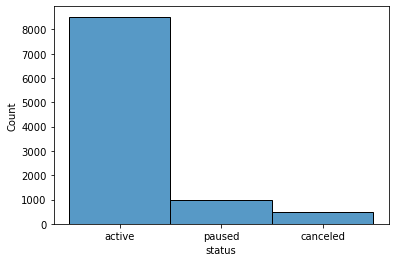

In [445]:
#checar a distribuição entre clientes ativos pausados e cancelados

df['status'].value_counts()
sns.histplot(df['status'])

### Descrevendo as relações estatisticas evidentes

In [446]:
df.describe()

,average_ticket,items_quantity,all_revenue,all_orders,recency,churn,duracao,idade
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,216.894709,8.49980,1174.888603,5.415400,67.192900,-0.04660,866.520800,53.961120
std,22.757213,3.02604,763.141973,3.457577,175.723276,0.38137,526.349662,16.058043
min,131.378672,1.00000,0.000000,0.000000,1.000000,-1.00000,0.000000,26.000000
25%,201.398851,6.00000,494.873564,2.000000,31.000000,0.00000,404.000000,40.200000
50%,217.019478,8.00000,1172.751918,5.000000,35.000000,0.00000,854.000000,54.000000
75%,232.455042,11.00000,1798.475045,8.000000,39.000000,0.00000,1320.250000,67.700000
max,303.386848,19.00000,3225.654163,11.000000,1820.000000,1.00000,1804.000000,82.000000


### Pode-se usar um Diagrama de Correlações na tentativa de perceber alguma correlação já aparente entre as features.

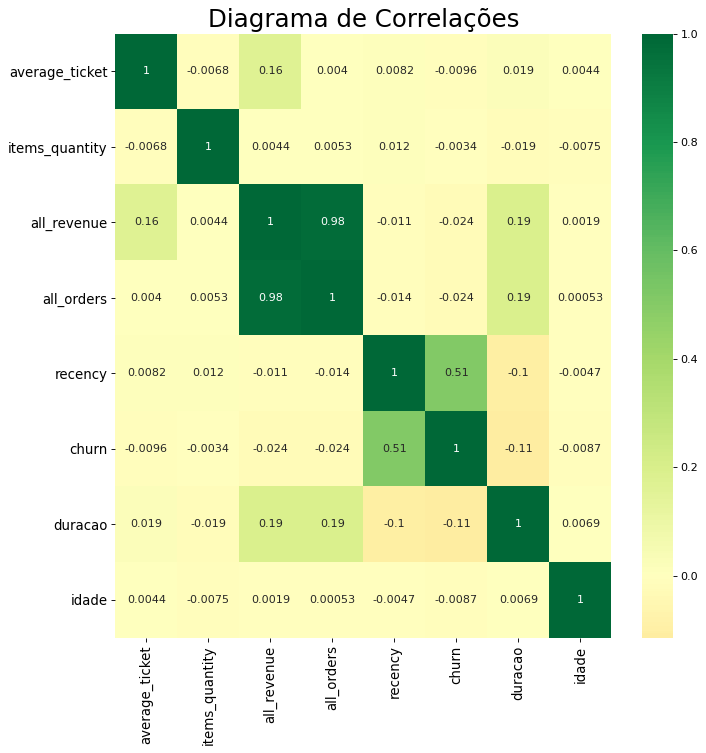

In [447]:


plt.figure(figsize=(10,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Diagrama de Correlações', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Análise da *recency*

In [448]:
churn_recency_mean = df.loc[df['churn'] == 1].recency.mean()
notchurn_recency_mean = df.loc[df['churn'] == 0].recency.mean()
paused_recency_mean = df.loc[df['churn'] == -1].recency.mean()

print(F'Média de dias desde o último pedido (Churn = 1): {churn_recency_mean}')
print(F'Média de dias desde o último pedido (Churn = 0):{notchurn_recency_mean}')
print(F'Média de dias desde o último pedido (Churn = -1):{paused_recency_mean}')

Média de dias desde o último pedido (Churn = 1): 680.9702970297029
Média de dias desde o último pedido (Churn = 0):34.53214453308306
Média de dias desde o último pedido (Churn = -1):34.69309989701339


### Análise dos Grupos Etários

Para essa análise foram dividas as populações em cinco grupos, estes sendo:

**Grupo 1 : 26 até 37.2**    
**Grupo 2: 37.2 até 48.4**    
**Grupo 3: 48.4 até 59.6**    
**Grupo 4:59.6 até 70.8**    
**Grupo 5: 70.8 até 82**

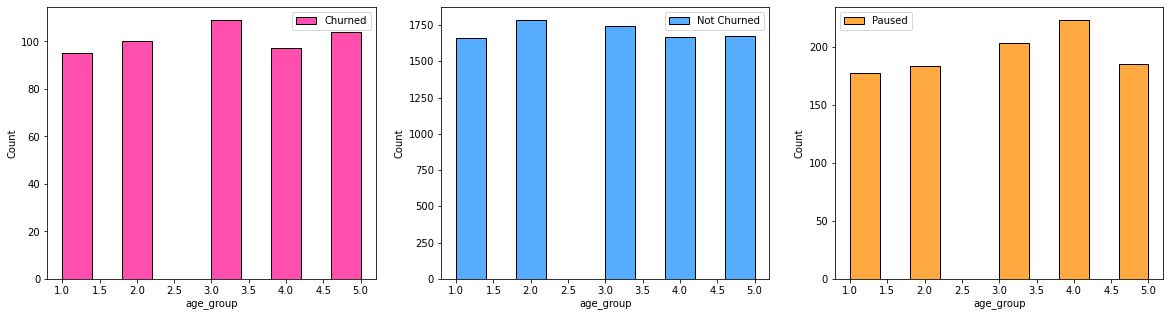

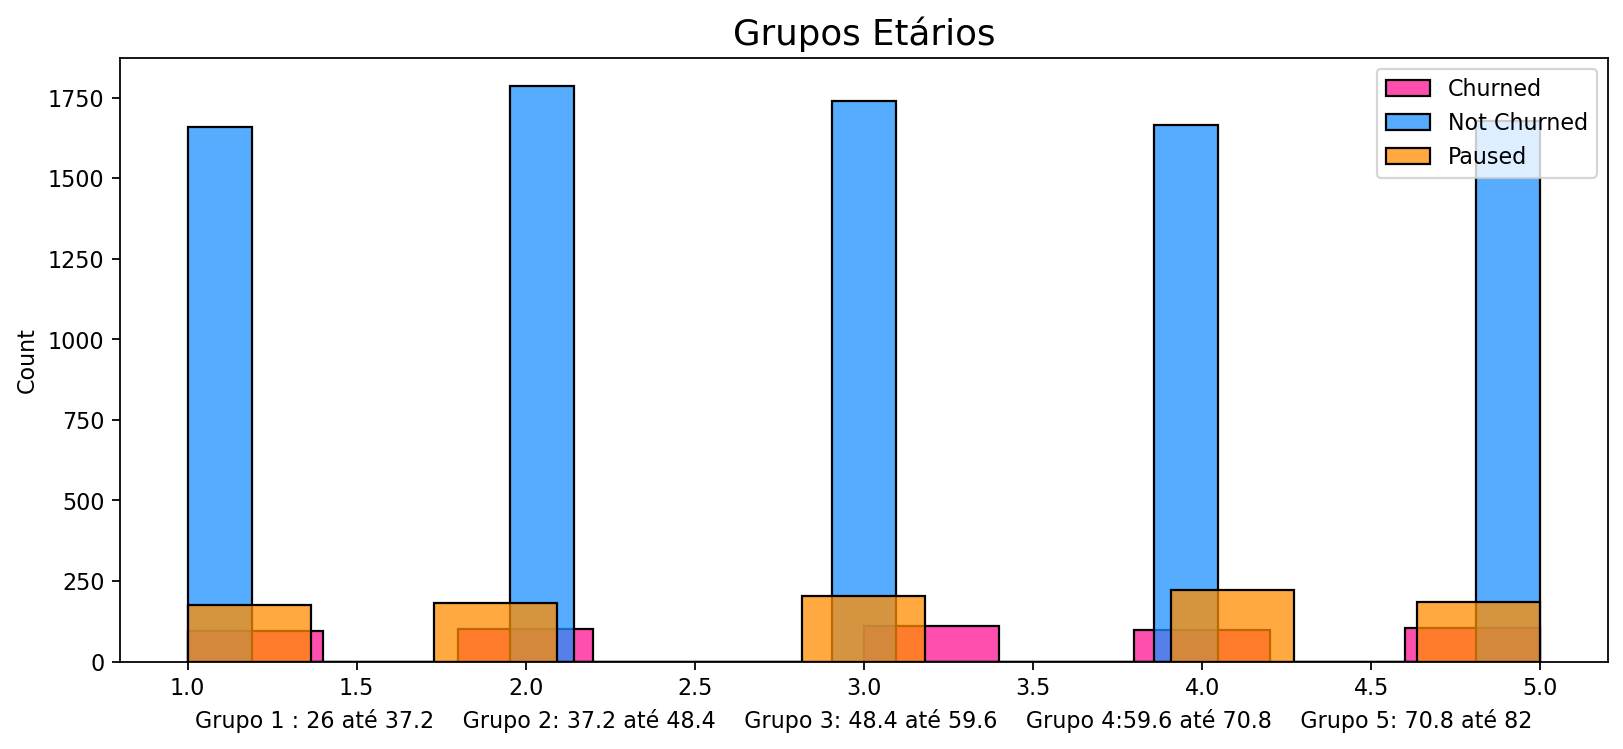

In [449]:
# Idade e Churn
    
df.loc[(df['idade'] >= 26) & (df['idade'] < 37.2), 'age_group'] = 1
df.loc[(df['idade'] >= 37.2) & (df['idade'] < 48.4), 'age_group'] = 2
df.loc[(df['idade'] >= 48.4) & (df['idade'] < 59.6), 'age_group'] = 3
df.loc[(df['idade'] >= 59.6) &  (df['idade'] < 70.8), 'age_group'] = 4
df.loc[(df['idade'] >= 70.8) &  (df['idade'] <= 82), 'age_group'] = 5

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 5))


ax = sns.histplot(df[df['churn']== 1].age_group, bins = 10,color='deeppink' ,  label = 'Churned',kde =False ,ax = axes[0])
ax.legend()
ax = sns.histplot(df[df['churn']== 0].age_group, bins = 10 ,label = 'Not Churned',color='dodgerblue',kde = False,ax = axes[1])
ax.legend()
ax = sns.histplot(df[df['churn']== -1].age_group, bins = 10 ,label = 'Paused',color='darkorange', kde = False, ax = axes[2])
ax.legend()


plt.figure(figsize=(12,5), dpi= 160)

sns.histplot(df.loc[df['churn'] == 1].age_group,  color="deeppink", label="Churned", kde =False) #shade=True, alpha=.7,
sns.histplot(df.loc[df['churn'] == 0].age_group, color="dodgerblue", label="Not Churned",kde =False) #shade=True,
sns.histplot(df.loc[df['churn'] == -1].age_group,  color="darkorange", label="Paused",kde =False)#shade=True,

plt.title('Grupos Etários', fontsize=16)
plt.legend()
plt.xlabel('Grupo 1 : 26 até 37.2    Grupo 2: 37.2 até 48.4    Grupo 3: 48.4 até 59.6    Grupo 4:59.6 até 70.8    Grupo 5: 70.8 até 82')
plt.show()

In [450]:
df.loc[(df['idade'] >= 26) & (df['idade'] < 37.2), 'age_group'] = 1
df.loc[(df['idade'] >= 37.2) & (df['idade'] < 48.4), 'age_group'] = 2
df.loc[(df['idade'] >= 48.4) & (df['idade'] < 59.6), 'age_group'] = 3
df.loc[(df['idade'] >= 59.6) &  (df['idade'] < 70.8), 'age_group'] = 4
df.loc[(df['idade'] >= 70.8) &  (df['idade'] <= 82), 'age_group'] = 5

age_c = (df.loc[df['churn'] == 1].age_group).value_counts()
churn_total = len(df.loc[df['churn'] == 1])
total_nc = (df.age_group).value_counts()

age_churn_perc = pd.DataFrame({'age_group': {1:'26 : 37.2',2:'37.2 : 48.4',3:'48.4 : 59.6 ',4:'59.6 : 70.8',5:'70.8 : 82'},
                               'churn percentage' : age_c/churn_total,'churn count': age_c ,
                               'total count': total_nc ,'total percentage': age_c/total_nc})

age_churn_perc.head()

,age_group,churn percentage,churn count,total count,total percentage
1.0,26 : 37.2,0.188119,95,1930,0.049223
2.0,37.2 : 48.4,0.198020,100,2068,0.048356
3.0,48.4 : 59.6,0.215842,109,2052,0.053119
4.0,59.6 : 70.8,0.192079,97,1985,0.048866
5.0,70.8 : 82,0.205941,104,1965,0.052926


Após segmentar os grupos etários e promover uma visualização gráfica dos mesmos,  percebe-se uma **baixa correlação** entre a idade e a tendência ao Churn, isso se deve pela distribuição regular entre as populações. 
Contudo pode-se levantar a hipótese que pessoas no **grupo 3 (Entre 48,4 e 59,6 anos)** são as mais tendenciosas ao Churn

### Análise referente a Duração da Assinatura

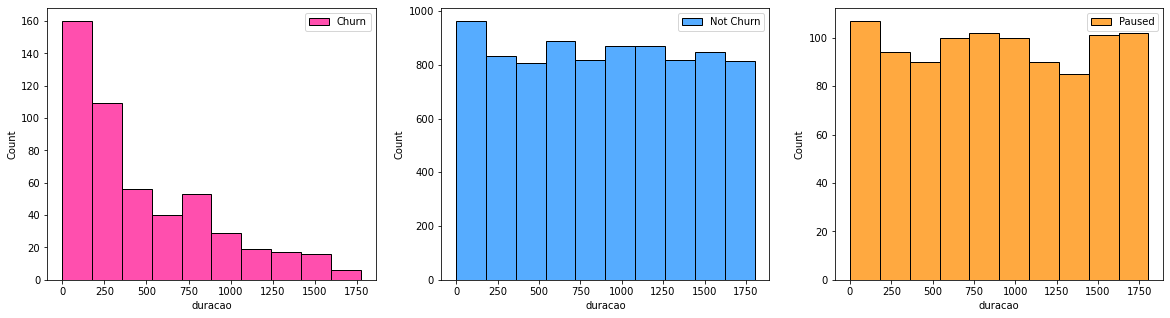

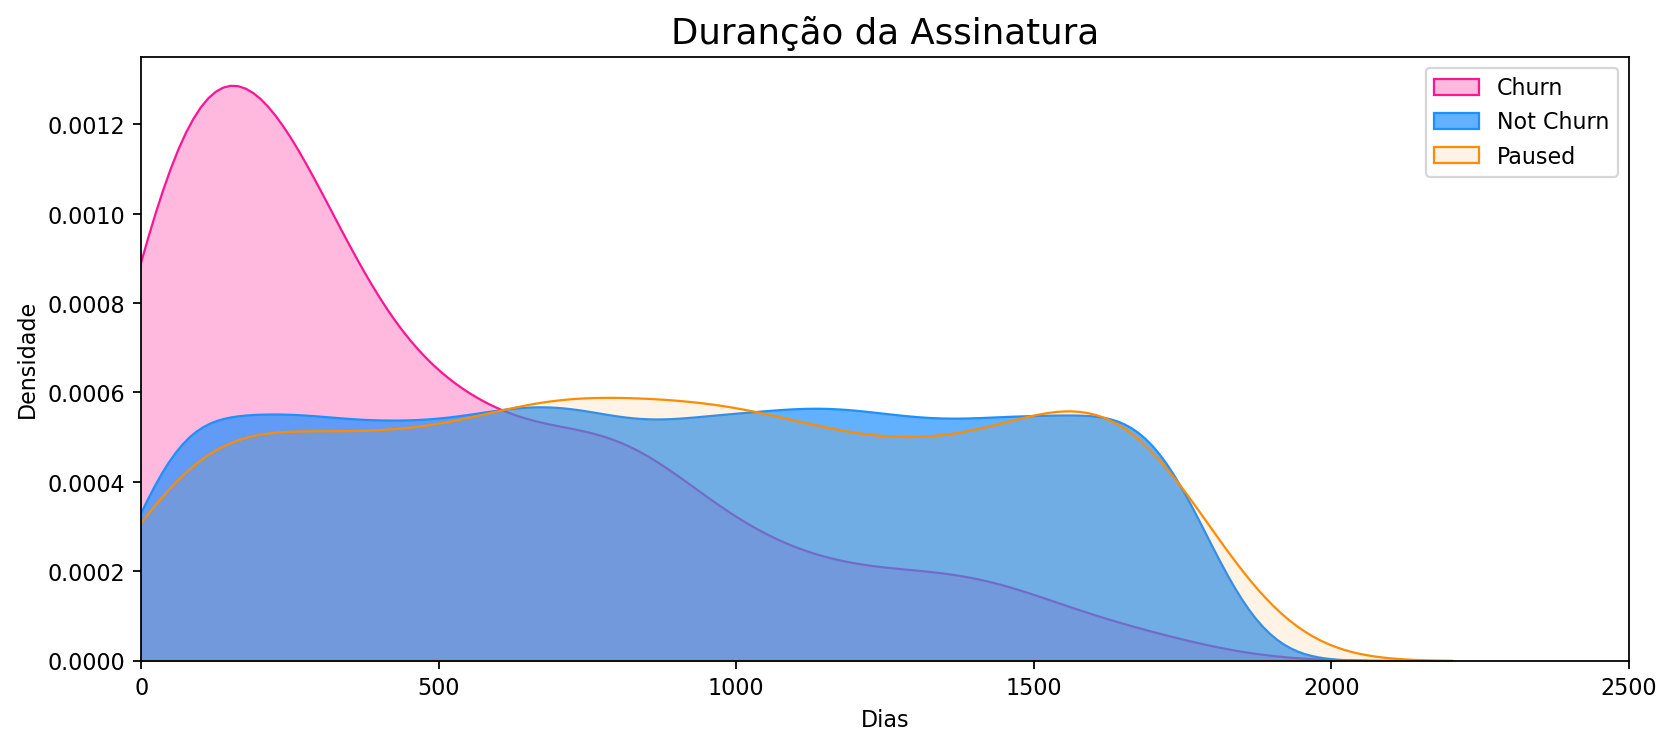

In [451]:
# Duracao de Assinatura

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 5))

ax = sns.histplot(df[df['churn']== 1].duracao, bins = 10, ax = axes[0],color='deeppink' ,  label = 'Churn',kde =False)
ax.legend()
ax = sns.histplot(df[df['churn']== 0].duracao, bins = 10 ,label = 'Not Churn',color='dodgerblue',  ax = axes[1],kde = False)
ax.legend()
ax = sns.histplot(df[df['churn']== -1].duracao, bins = 10 ,label = 'Paused',color='darkorange',  ax = axes[2],kde = False)
ax.legend()


plt.figure(figsize=(12,5), dpi= 160)

sns.kdeplot(df.loc[df['churn'] == 1].duracao, shade=True, color="deeppink", label="Churn",alpha=.3)
sns.kdeplot(df.loc[df['churn'] == 0].duracao, shade=True, color="dodgerblue", label="Not Churn", alpha=.7)
sns.kdeplot(df.loc[df['churn'] == -1].duracao, shade=True, color="darkorange", label="Paused", alpha=.10)

plt.title('Duranção da Assinatura', fontsize=16)
plt.xlim(0 ,2500)
plt.xlabel('Dias')
plt.ylabel('Densidade')
plt.legend()
plt.show()

In [452]:
churn_dur = (df.loc[df['churn'] == 1].duracao)
quartil = churn_dur.max()/4
#churn_dur_mean.describe()

churn_threshold = len((df.loc[(df['churn'] == 1)& (df['duracao'] > 0) &(df['duracao'] < quartil)]).value_counts())
churn_total = len(df.loc[df['churn'] == 1])
churn_perc_thresh = churn_threshold/churn_total

print(F'Percentual de evasões no período analisado: {(churn_perc_thresh*100)}%')
churn_dur.describe()

Percentual de evasões no período analisado: 57.227722772277225%


count     505.000000
mean      471.700990
std       423.662606
min         0.000000
25%       133.000000
50%       322.000000
75%       750.000000
max      1771.000000
Name: duracao, dtype: float64

Fica evidente o período onde ocorrem as evasões, sendo entre **0 e 442 dias**, isso é indicado pelo período do **1° Quartil (0 até 442)** com  **57,2%** de todas as evasões ocorrendo neste período.
Essa hipótese também é corroborada ao se observar o **alto desvio padrão**, o que indica uma **distribuição desbalanceda** das populações.

### Análise da Receita Total Acumulada

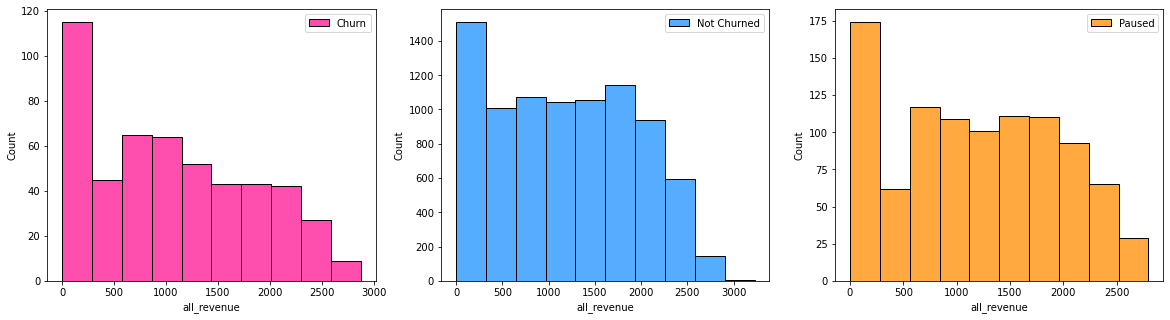

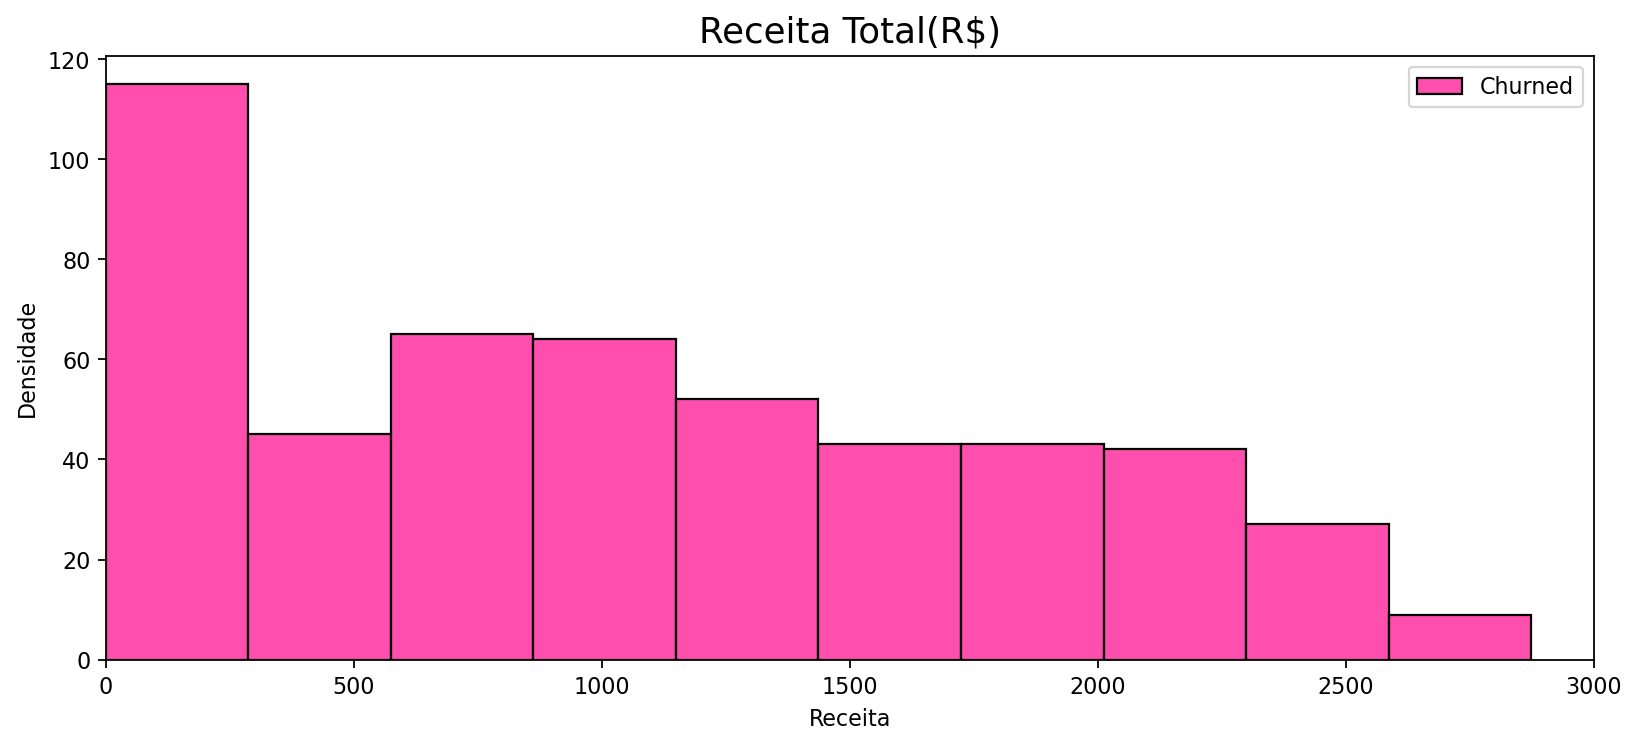

In [453]:
# Receita total

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 5))

ax = sns.histplot(df[df['churn']== 1].all_revenue, bins = 10, ax = axes[0],color='deeppink' , label = 'Churn',kde =False)
ax.legend()
ax = sns.histplot(df[df['churn']== 0].all_revenue, bins = 10 ,label = 'Not Churned', color='dodgerblue', ax = axes[1],kde = False)
ax.legend()
ax = sns.histplot(df[df['churn']== -1].all_revenue, bins = 10 ,label = 'Paused', color='darkorange', ax = axes[2],kde = False)
ax.legend()

plt.figure(figsize=(12,5), dpi= 160)


sns.histplot(df.loc[(df['churn'] == 1)].all_revenue,  color="deeppink", label="Churned")#, alpha=.5,shade=True)
#sns.kdeplot(df.loc[df['churn'] == 0].all_revenue,  color="dodgerblue", label="Not Churned", alpha=.7,shade=True)
#sns.kdeplot(df.loc[df['churn'] == -1].all_revenue, color="darkorange", label="Paused", alpha=.10,shade=True)

plt.title('Receita Total(R$)', fontsize=16)
plt.xlabel('Receita')
plt.ylabel('Densidade')
plt.xlim(0,3000,50)

plt.legend()
plt.show()

In [454]:
churn_allr = (df.loc[df['churn'] == 1].all_revenue)
quartil = churn_allr.max()/4

#churn_allr_mean.describe()

churn_threshold = len((df.loc[(df['churn'] == 1)& (df['all_revenue'] >= 0) &(df['all_revenue'] < quartil)]).value_counts())
churn_total = len(df.loc[df['churn'] == 1])
churn_perc_thresh = churn_threshold/churn_total

print(F'Média de Gasto Acumulado antes do Churn: {churn_allr.mean()}')
print(F'Percentual de indivíduos que cancelam a assinatura nessa faixa: {(churn_perc_thresh*100)}%')
churn_allr.describe()

Média de Gasto Acumulado antes do Churn: 1059.4057517189262
Percentual de indivíduos que cancelam a assinatura nessa faixa: 39.40594059405941%


count     505.000000
mean     1059.405752
std       774.373741
min         0.000000
25%       403.113961
50%       984.359042
75%      1669.802614
max      2873.700656
Name: all_revenue, dtype: float64

A medida com que os gastos sobem, diminui a tendência ao Churn, isso porque **39,4%** dos clientes desistentes o fazem antes de acumular aproximadamente **R$1.060,00**. Isso indica que os clientes que a maioria dos clientes que desistem da assinatura o fazem nos **primeiros meses** ou seja enquanto seu gasto acumulado ainda não é significativo.
Isso é também corroborado pela curva de clientes não desistentes que seguem num ritmo de consumo aproximadamente constante. Contudo o alto desvio padrão mostra uma distribuição irregular, o que pode indicar que evasões ocorrem ainda mais precocemente. com sua concentração estando entre **0 e 500 reais**.

### Análise do Ticket Médio

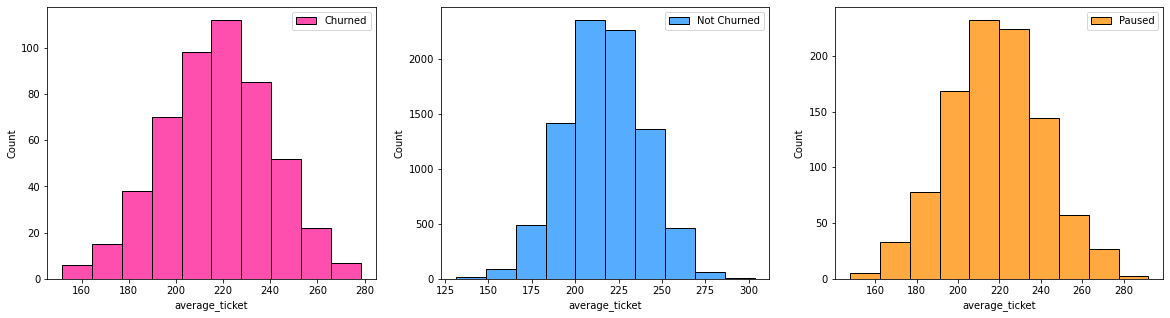

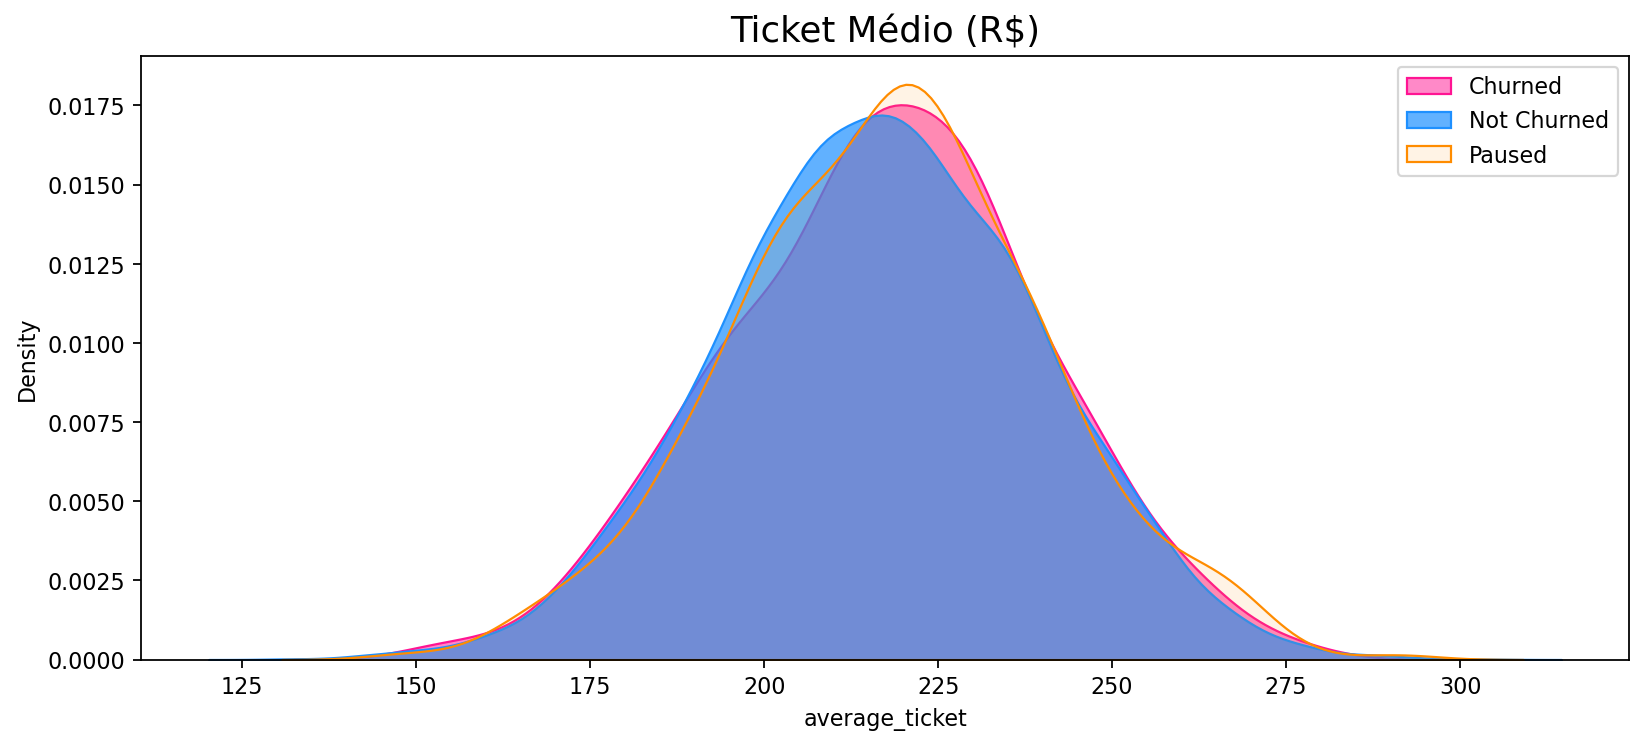

In [455]:
#Ticket Médio e Churn

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 5))

ax = sns.histplot(df[df['churn']== 1].average_ticket, bins = 10, ax = axes[0],color='deeppink' ,  label = 'Churned',kde =False)
ax.legend()
ax = sns.histplot(df[df['churn']== 0].average_ticket, bins = 10 ,label = 'Not Churned', color='dodgerblue' , ax = axes[1],kde = False)
ax.legend()
ax = sns.histplot(df[df['churn']== -1].average_ticket, bins = 10 ,label = 'Paused', color = 'darkorange' ,ax = axes[2],kde = False)
ax.legend()

plt.figure(figsize=(12,5), dpi= 160)

sns.kdeplot(df.loc[df['churn'] == 1].average_ticket, shade=True, color="deeppink", label="Churned", alpha=.5)
sns.kdeplot(df.loc[df['churn'] == 0].average_ticket, shade=True, color="dodgerblue", label="Not Churned", alpha=.7)
sns.kdeplot(df.loc[df['churn'] == -1].average_ticket, shade=True, color="darkorange", label="Paused", alpha=.10)

plt.title('Ticket Médio (R$)', fontsize=16)
plt.legend()
plt.show()

In [456]:
avtk = (df.loc[df['churn'] == 1].average_ticket).mean()
print(F'Ticket médio dos clientes que cancelam assinatura: {avtk}')


Ticket médio dos clientes que cancelam assinatura: 217.43850146117575



O gráfico acima mostra que o ticket médio dos 3 perfis análisados são bastante semelhantes o que corrobora para a hipótese que esse fator **não seja determinante** no Churn.
Contudo este gráfico adiciona peso a tese que o estimulo ao consumo serve como premissa para a fidelização do cliente, visto que no estudo acima (***all_revenue***) percebe-se a tendência de um cliente interromper a sua assinatura antes dos **R$ 1060,00**

Numa análise inicial, partindo da hipótese que o ticket médio ocorre **mensalmente**, como a média da ***recency (34 dias)*** sugere. Se o ticket médio de um cliente é de cerca de **215,00** e o início das desistências se dá quando o cliente atinge um gasto de próximo a **1060,00** , se pode inferir que isso ocorre num período inferior a **5 meses** (1060/215) aproximadamente **168 dias**, o que corrobora a média de duração dos contratos desistentes que ocorrem entre **0 e 442 dias**.

### Análise dos Canais de Marketing

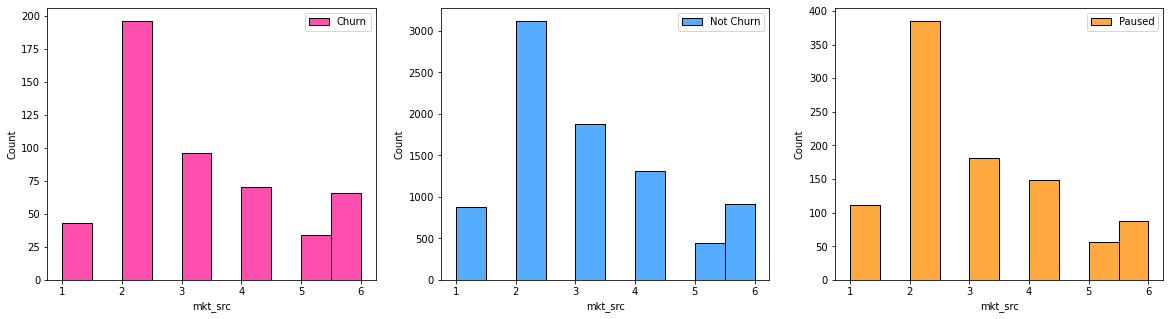

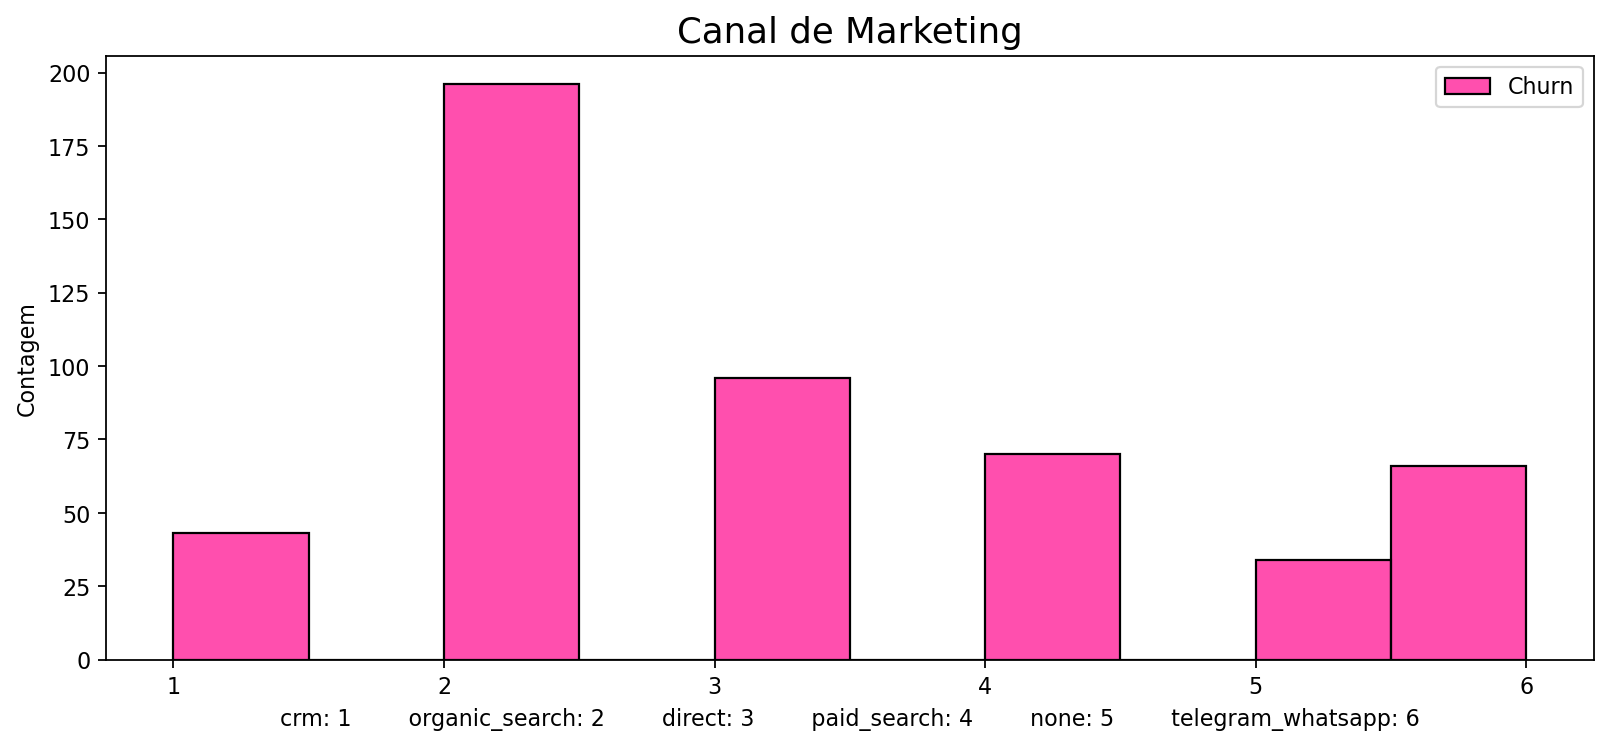

In [457]:
# Marketing e Churn

mkt_val = pd.unique(df['marketing_source'].values)
mkt_src = {'crm':1, 'organic_search':2, 'direct':3, 'paid_search':4, 'none':5,'telegram_whatsapp':6}
df['mkt_src'] = df['marketing_source'].map(mkt_src)


fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 5))


ax = sns.histplot(df[df['churn']== 1].mkt_src, bins = 10,color='deeppink' ,  label = 'Churn',kde =False ,ax = axes[0])
ax.legend()
ax = sns.histplot(df[df['churn']== 0].mkt_src, bins = 10 ,label = 'Not Churn',color='dodgerblue',kde = False,ax = axes[1])
ax.legend()
ax = sns.histplot(df[df['churn']== -1].mkt_src, bins = 10 ,label = 'Paused',color='darkorange', kde = False, ax = axes[2])
ax.legend()


plt.figure(figsize=(12,5), dpi= 160)

sns.histplot(df.loc[df['churn'] == 1].mkt_src,  color="deeppink", label="Churn", kde =False)
#sns.histplot(df.loc[df['churn'] == 0].mkt_src, color="dodgerblue", label="Not Churned",kde =False) 
#sns.histplot(df.loc[df['churn'] == -1].mkt_src,  color="darkorange", label="Paused",kde =False)

plt.title('Canal de Marketing', fontsize=16)
plt.xlabel('crm: 1        organic_search: 2        direct: 3        paid_search: 4        none: 5        telegram_whatsapp: 6')
plt.ylabel('Contagem')
plt.legend()
plt.show()


In [458]:
mkt_c = (df.loc[df['churn'] == 1].mkt_src).value_counts()
churn_total = len(df.loc[df['churn'] == 1])
total_nc = (df.mkt_src).value_counts()

mkt_churn_perc = pd.DataFrame({'mkt_src': {1:'crm',2:'organic_search',3:'direct',4:'paid_search',5:'none',6:'telegram_whatsapp'},
                               'churn percentage' : mkt_c/churn_total ,'churn count': mkt_c ,
                               'total count': total_nc ,'total percentage': mkt_c/total_nc })

mkt_churn_perc.head(6)

,mkt_src,churn percentage,churn count,total count,total percentage
1,crm,0.085149,43,1029,0.041788
2,organic_search,0.388119,196,3699,0.052987
3,direct,0.190099,96,2149,0.044672
4,paid_search,0.138614,70,1526,0.045872
5,none,0.067327,34,529,0.064272
6,telegram_whatsapp,0.130693,66,1068,0.061798


***Tráfego Orgânico*** é evidentemente o principal motivo de churn representando **38,8%** dos casos, isso é evidenciado não apenas pelos percentuais menores nas outras categorias mas pelo gráfico de densidade dos clientes ativos.

Contatos via ***Direct*** e ***Tráfego Pago*** também representam parcelas significativas e junto ao ***Tráfego Orgânico*** somam **71,6%** de cancelamentos.

Existe uma relação direta entre o contato direto com o cliente e sua permanência, isso é corroborado tanto pelos menores ídices de churn nessas categorias(Marketing Ativo) quanto no por porcentagens significativas no gráfico de permanência.

### Análise da Versão de Assinatura

Para essa análise foram dividas as populações em oito grupos referentes aos tipos de assinatura, estes sendo:

**Grupo 0: Formato 0.X.X**

**Grupo 1: Formato 1.X.X**

**Grupo 2: Formato 2.X.X**

**Grupo 3: Formato 3.X.X**

**Grupo 4: Formato 4.X.X**

**Grupo 5: Formato 5.X.X**

**Grupo 6: Formato 6.X.X**

**Grupo 7: Formato 7.X.X**

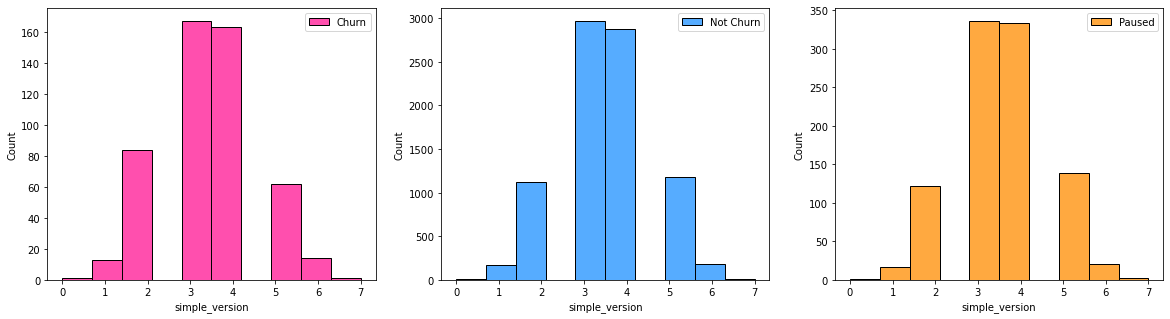

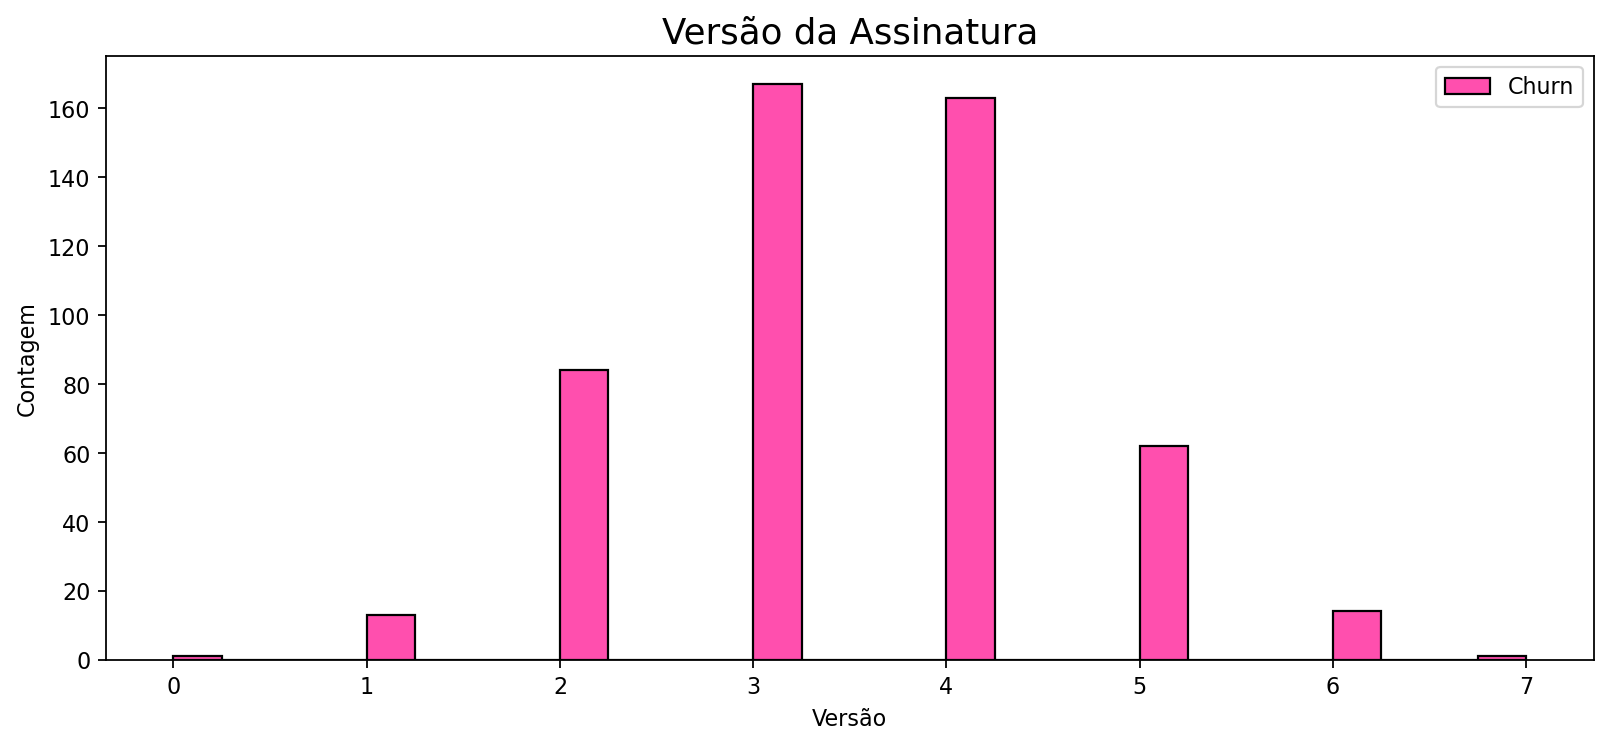

In [459]:
# Versão da Assinatura

ver_val = pd.unique(df['version'].values)
ver_val = df['version'].str[:1]
ver_val = pd.unique(ver_val.values)
ver_src = {'0':0, '1':1, '2':2, '3':3, '4':4,'5':5,'6':6 ,'7':7}

df['simple_version'] = (df['version'].str[:1]).map(ver_src)

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 5))


ax = sns.histplot(df[df['churn']== 1].simple_version, bins = 10,color='deeppink' ,  label = 'Churn',kde =False ,ax = axes[0])
ax.legend()
ax = sns.histplot(df[df['churn']== 0].simple_version, bins = 10 ,label = 'Not Churn',color='dodgerblue',kde = False,ax = axes[1])
ax.legend()
ax = sns.histplot(df[df['churn']== -1].simple_version, bins = 10 ,label = 'Paused',color='darkorange', kde = False, ax = axes[2])
ax.legend()


plt.figure(figsize=(12,5), dpi= 160)

sns.histplot(df.loc[df['churn'] == 1].simple_version,  color="deeppink", label="Churn", kde =False) #shade=True, alpha=.7,
#sns.histplot(df.loc[df['churn'] == 0].simple_version, color="dodgerblue", label="Not Churn",kde =False) #shade=True,
#sns.histplot(df.loc[df['churn'] == -1].simple_version,  color="darkorange", label="Paused",kde =False)#shade=True,

plt.title('Versão da Assinatura', fontsize=16)
plt.xlabel('Versão')
plt.ylabel('Contagem')
plt.legend()
plt.show()

In [460]:
version_c = (df.loc[df['churn'] == 1].simple_version).value_counts()

churn_total = len(df.loc[df['churn'] == 1])
total_nc = (df.simple_version).value_counts()

version_churn_perc = pd.DataFrame({'simple_version': {0:'0.X.X',1:'1.X.X',2:'2.X.X',3:'3.X.X',
                                                      4:'4.X.X',5:'5.X.X',6:'6.X.X',7:'7.X.X'},'count':version_c,
                               'churn percentage' : version_c/churn_total ,'churn count': version_c ,
                               'total count': total_nc ,'total percentage': version_c/total_nc })


version_churn_perc.head(10)

,simple_version,count,churn percentage,churn count,total count,total percentage
0,0.X.X,1,0.001980,1,11,0.090909
1,1.X.X,13,0.025743,13,203,0.064039
2,2.X.X,84,0.166337,84,1324,0.063444
3,3.X.X,167,0.330693,167,3471,0.048113
4,4.X.X,163,0.322772,163,3375,0.048296
5,5.X.X,62,0.122772,62,1386,0.044733
6,6.X.X,14,0.027723,14,217,0.064516
7,7.X.X,1,0.001980,1,13,0.076923


Assinaturas do tipo **3.X.X** e **4.X.X** são as mais volumosas e consequentemente as que produzem mais churn. Juntas representam  **65,2%** de todas as assinaturas perdidas, o que pode sinalizar que pessoas nesses planos podem ser o alvo de novas campanhas e promoções. Ao adicionar os clientes do plano tipo **2.X.X** soma-se **83%** de Churn, os grupos anteriores devem ser priorizados contudo o grupo 2.X.X também deve ser alvo de ações de marketing.

### Análise Quantidade de Itens

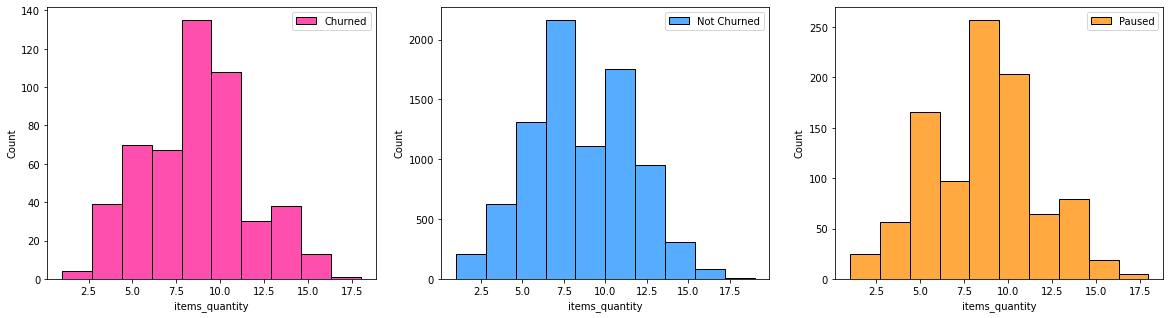

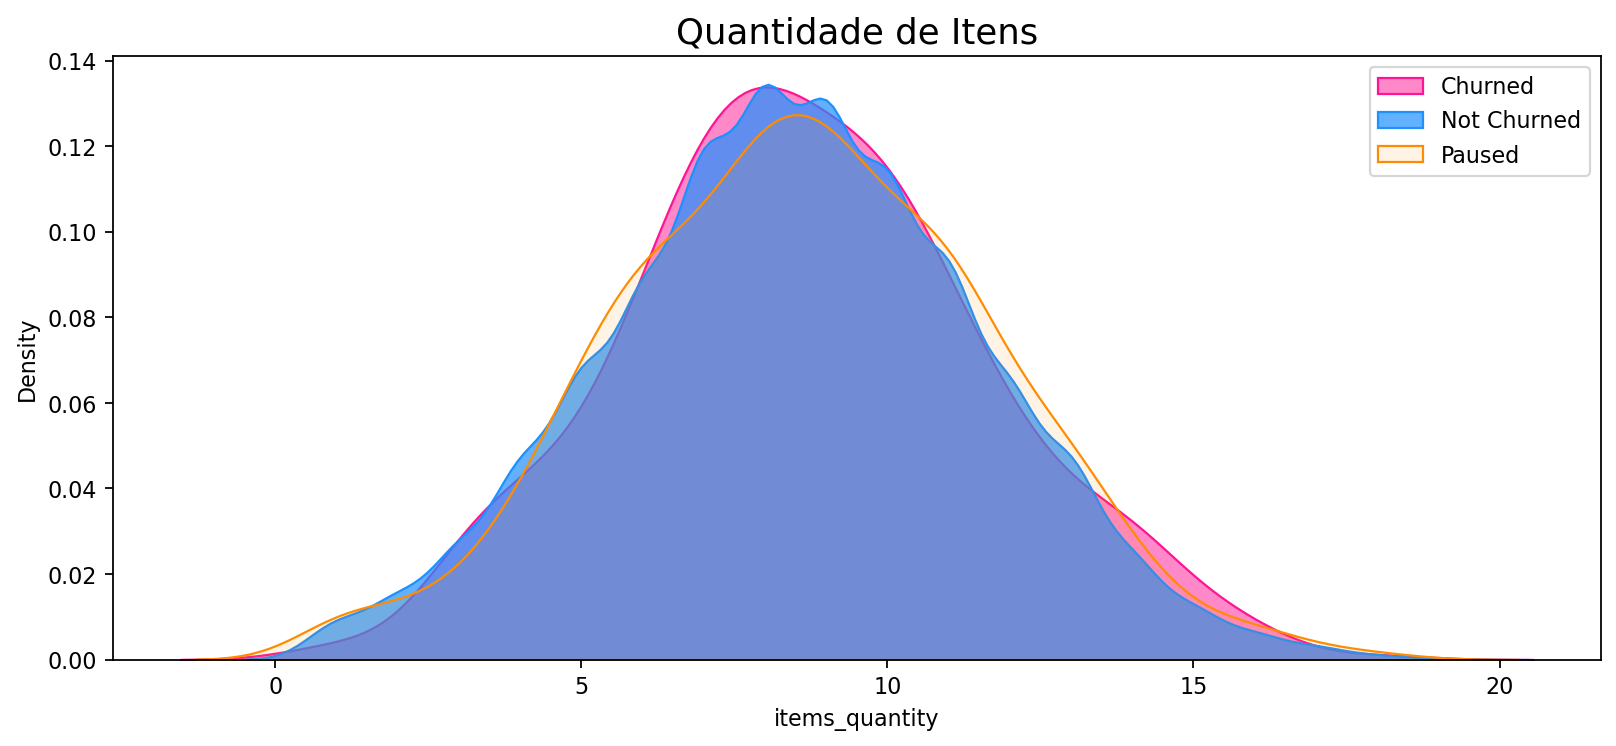

In [461]:
#Quantidade de Itens

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 5))

ax = sns.histplot(df[df['churn']== 1].items_quantity, bins = 10, ax = axes[0],color='deeppink' ,  label = 'Churned',kde =False)
ax.legend()
ax = sns.histplot(df[df['churn']== 0].items_quantity, bins = 10 ,label = 'Not Churned', color='dodgerblue' , ax = axes[1],kde = False)
ax.legend()
ax = sns.histplot(df[df['churn']== -1].items_quantity, bins = 10 ,label = 'Paused', color = 'darkorange' ,ax = axes[2],kde = False)
ax.legend()

plt.figure(figsize=(12,5), dpi= 160)

sns.kdeplot(df.loc[df['churn'] == 1].items_quantity, shade=True, color="deeppink", label="Churned", alpha=.5)
sns.kdeplot(df.loc[df['churn'] == 0].items_quantity, shade=True, color="dodgerblue", label="Not Churned", alpha=.7)
sns.kdeplot(df.loc[df['churn'] == -1].items_quantity, shade=True, color="darkorange", label="Paused", alpha=.10)

plt.title('Quantidade de Itens', fontsize=16)
plt.legend()
plt.show()

In [462]:
avqt = (df.loc[df['churn'] == 1].items_quantity).mean()
print(F'Quantidade média de itens dos clientes que cancelam assinatura: {avqt}')

Quantidade média de itens dos clientes que cancelam assinatura: 8.647524752475247


### Análise Número de Pedidos

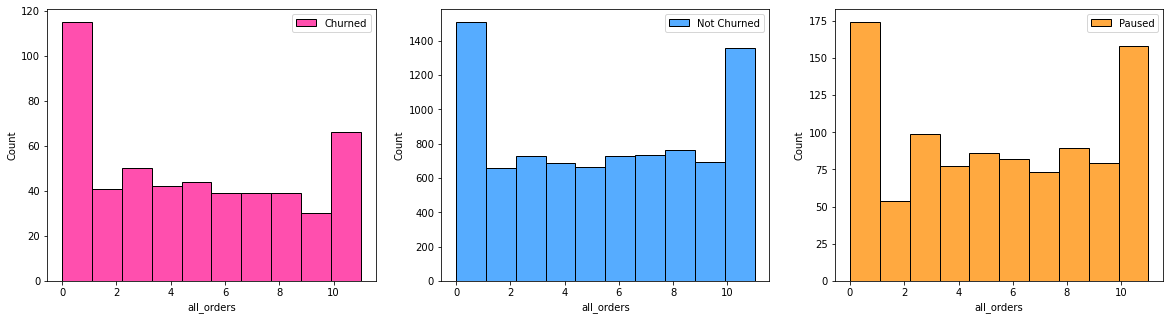

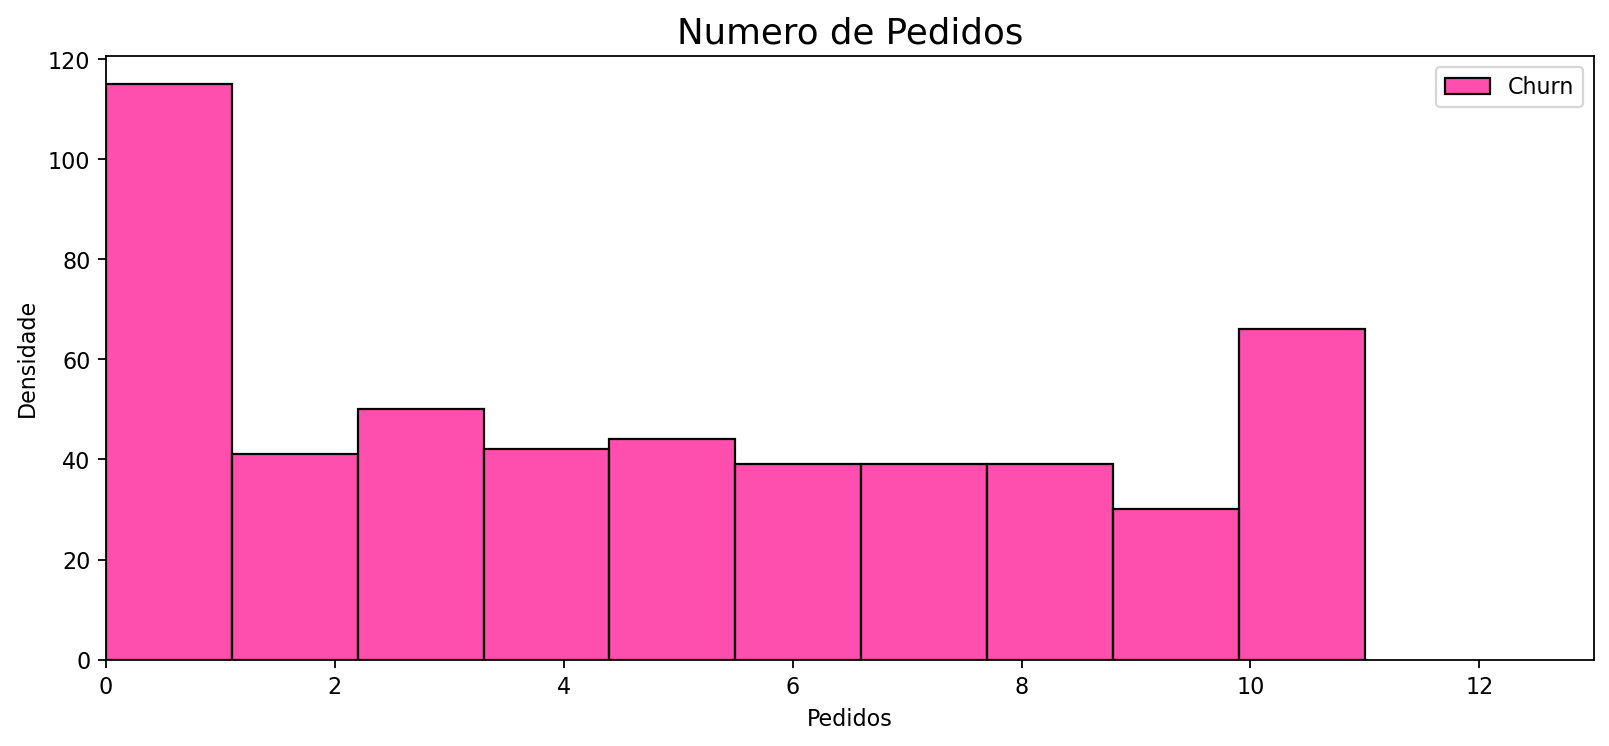

In [463]:
# Todos os pedidos

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 5))

ax = sns.histplot(df[df['churn']== 1].all_orders, bins = 10, ax = axes[0],color='deeppink' ,  label = 'Churned',kde =False)
ax.legend()
ax = sns.histplot(df[df['churn']== 0].all_orders, bins = 10 ,label = 'Not Churned', color='dodgerblue' , ax = axes[1],kde = False)
ax.legend()
ax = sns.histplot(df[df['churn']== -1].all_orders, bins = 10 ,label = 'Paused', color = 'darkorange' ,ax = axes[2],kde = False)
ax.legend()

plt.figure(figsize=(12,5), dpi= 160)

sns.histplot(df.loc[df['churn'] == 1].all_orders,  color="deeppink", label="Churn",)# alpha=.5)#shade=True,
#sns.kdeplot(df.loc[df['churn'] == 0].all_orders, shade=True, color="dodgerblue", label="Not Churned", alpha=.7)
#sns.kdeplot(df.loc[df['churn'] == -1].all_orders, shade=True, color="darkorange", label="Paused", alpha=.10)

plt.title('Numero de Pedidos', fontsize=16)
plt.xlim(0 ,13,1)
plt.xlabel('Pedidos')
plt.ylabel('Densidade')
plt.legend()
plt.show()

In [464]:
churn_allorder = (df.loc[df['churn'] == 1].all_orders)

#churn_allr_mean.describe()

# Houve a necessidade de descartar os valores nulos para a análise da média
#churn_allr = df.loc[(df['churn'] == 1) & (df['all_revenue'] < quartil) & (df['all_revenue'] != 0)].all_revenue

churn_threshold_1 = len((df.loc[(df['churn'] == 1)& (df['all_orders'] >= 0) &(df['all_orders'] < 5)]).value_counts())
churn_threshold_2 = len((df.loc[(df['churn'] == 1)& (df['all_orders'] >= 0) &(df['all_orders'] < 2)]).value_counts())
churn_threshold_3 = len((df.loc[(df['churn'] == 1)& (df['all_orders'] == 0)].value_counts()))

churn_total = len(df.loc[df['churn'] == 1])
                        
churn_perc_thresh_1 = churn_threshold_1/churn_total
churn_perc_thresh_2 = churn_threshold_2/churn_total
churn_perc_thresh_3 = churn_threshold_3/churn_total

print(F'Média de pedidos antes do Churn: {churn_allorder.mean()}')
print(F'Percentual de indivíduos que cancelam a assinatura nessa faixa: {churn_perc_thresh_1}')
print(F'Percentual de indivíduos que cancelam a assinatura no primeiro pedido: {churn_perc_thresh_2}')
print(F'Percentual de indivíduos que cancelam a assinatura sem nenhum pedido: {churn_perc_thresh_3}')

churn_allorder.describe()

Média de pedidos antes do Churn: 4.857425742574257
Percentual de indivíduos que cancelam a assinatura nessa faixa: 0.4910891089108911
Percentual de indivíduos que cancelam a assinatura no primeiro pedido: 0.22772277227722773
Percentual de indivíduos que cancelam a assinatura sem nenhum pedido: 0.13267326732673268


count    505.000000
mean       4.857426
std        3.483446
min        0.000000
25%        2.000000
50%        5.000000
75%        8.000000
max       11.000000
Name: all_orders, dtype: float64

Ao se analisar o primeiro quartil, percebe-se que aproximadamente **5** pedidos acontecem antes do cancelamento. Contudo é apresentada uma nova perspectiva, **22,7%** dos cancelamentos já acontecem no primeiro pedido, e **13,26%** ocorrem sem pedido algum.

**49,1 %** dos cancelamentos ocorrem nessa faixa de **0 a 5 pedidos**  o que é ressalta a importantância de se analisar esse período em específico. Ou seja, a janela de tempo de evasão é menor ainda do que o imaginado.

### Análise de Regiões

Para essa análise foram dividas as populações em cinco grupos referentes as regiões do brasil, estes sendo:

**Grupo 1 : Norte**    
**Grupo 2: Nordeste**    
**Grupo 3: Centro-Oeste**    
**Grupo 4: Sudeste**    
**Grupo 5: Sul**

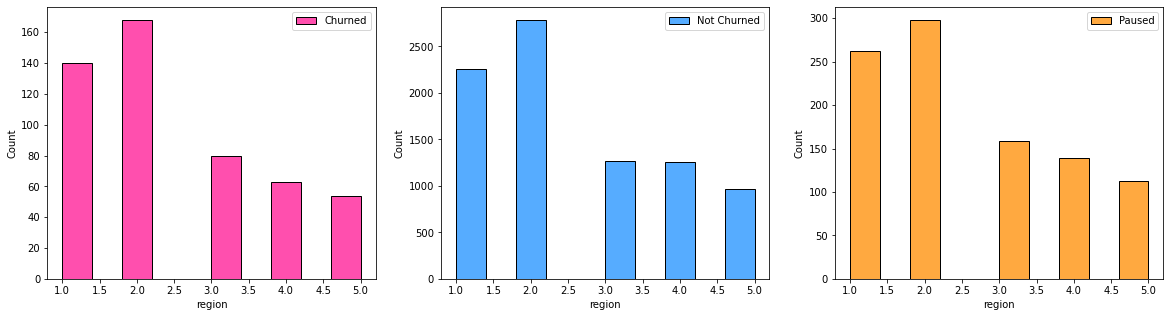

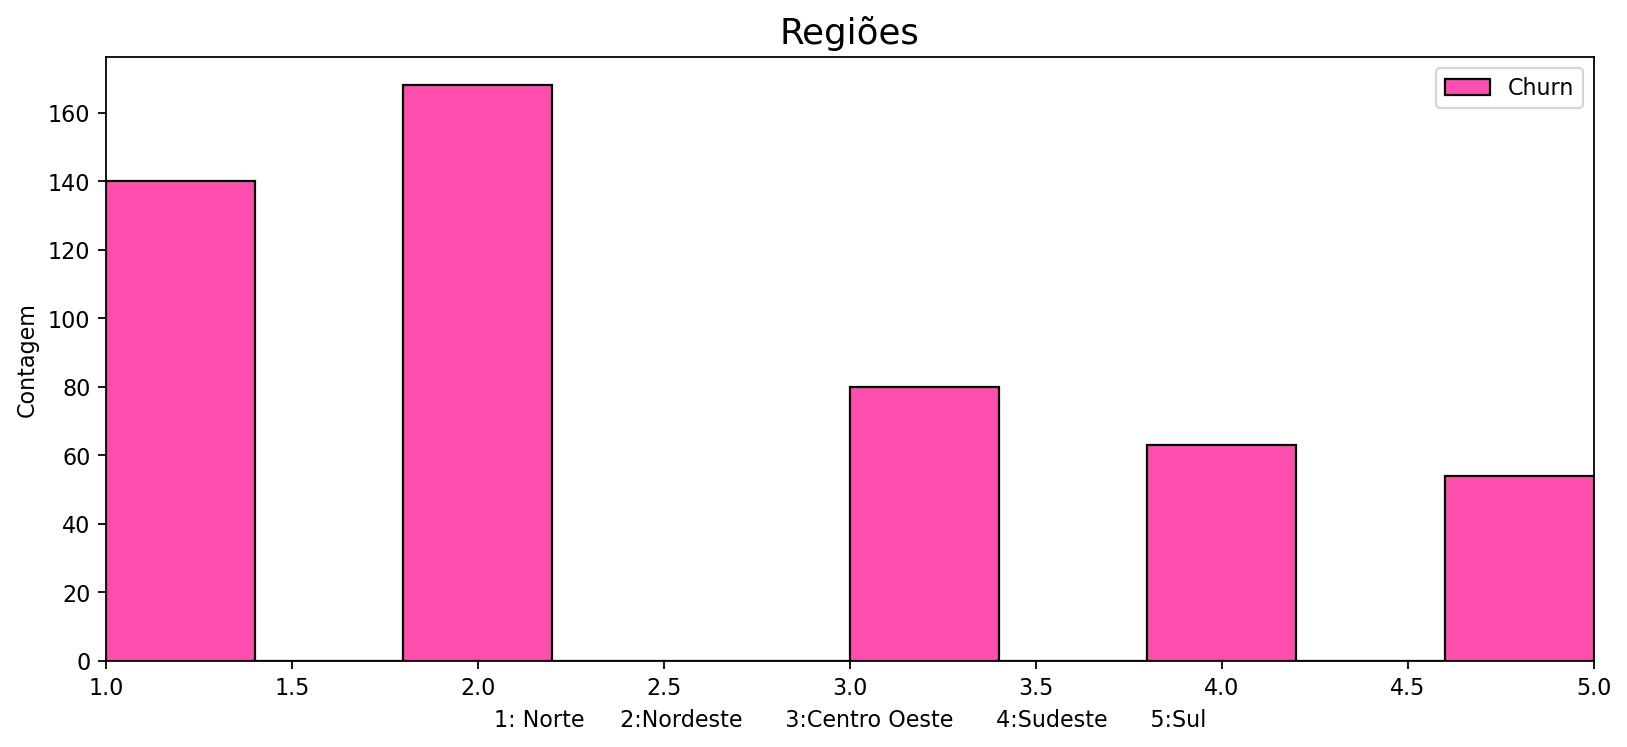

In [465]:
# Regiao

state_src = {'AC':1,'AM':1,'AP':1,'PA':1,'RO':1,'TO':1,'RR':1 , 
             'MA':2,'PI':2,'CE':2,'RN':2,'PB':2,'PE':2,'AL':2,'SE':2,'BA':2, 
             'MT':3,'DF':3,'GO':3,'MS':3, 'MG':4,'ES':4,'RJ':4,'SP':4, 'PR':5,'SC':5,'RS':5}

df['region'] = df['state'].map(state_src)

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 5))


ax = sns.histplot(df[df['churn']== 1].region, bins = 10,color='deeppink' ,  label = 'Churned',kde =False ,ax = axes[0])
ax.legend()
ax = sns.histplot(df[df['churn']== 0].region, bins = 10 ,label = 'Not Churned',color='dodgerblue',kde = False,ax = axes[1])
ax.legend()
ax = sns.histplot(df[df['churn']== -1].region, bins = 10 ,label = 'Paused',color='darkorange', kde = False, ax = axes[2])
ax.legend()


plt.figure(figsize=(12,5), dpi= 160)

sns.histplot(df.loc[df['churn'] == 1].region,  color="deeppink", label="Churn", kde =False)
#sns.histplot(df.loc[df['churn'] == 0].region, color="dodgerblue", label="Not Churned",kde =False)
#sns.histplot(df.loc[df['churn'] == -1].region,  color="darkorange", label="Paused",kde =False)

plt.title('Regiões', fontsize=16)
plt.xlim(1,5,1)
plt.xlabel('1: Norte     2:Nordeste      3:Centro Oeste      4:Sudeste      5:Sul')
plt.ylabel('Contagem')
plt.legend()
plt.show()

In [466]:
region_c = df.loc[df['churn'] == 1].region.value_counts()

churn_total = len(df.loc[df['churn'] == 1])
total_nc = (df.region).value_counts()

region_churn_perc = pd.DataFrame({'region': {1:'Norte',2:'Nordeste',3:'Centro-Oeste',4:'Sudeste',5:'Sul'},'count':region_c,
                               'churn percentage' : region_c/churn_total,'churn count': region_c ,
                               'total count': total_nc ,'total percentage': region_c/total_nc  })


region_churn_perc.head()

,region,count,churn percentage,churn count,total count,total percentage
1,Norte,140,0.277228,140,2655,0.052731
2,Nordeste,168,0.332673,168,3250,0.051692
3,Centro-Oeste,80,0.158416,80,1502,0.053262
4,Sudeste,63,0.124752,63,1456,0.043269
5,Sul,54,0.106931,54,1137,0.047493


Sozinhas as regiões Norte e Nordeste somam **60,9%** de todos os casos de Churn, o que pode sugerir que futuras ações de marketing devem priorizar essas regiões.

Se se somar as incidências também no centro-oeste, juntos as 3 regiões equivalem a **76,7%** de todos os cancelamentos.

## As seguintes informações retiradas da análise exploratória foram consideradas relevantes.


A Média de recency entre os clientes ativos: **34**.

A idade das populações **não é** um fator correlacionado ao Churn.

O período com maior incidência ocorre no primeiro Quartil (**0 a 442 dias**) dos valores de *duracao* e corresponde a **57%** dos Churns.

A Gastos Acumulados por clientes antes do cancelamento são de até **R$ 1.060,00** e correspondem a **40%** dos Churns. Contudo o alto desvio padrão pode indicar que as evasões estão concentradas antes mesmo dos **300,00**

O ticket médio dos clientes é de **217,00**.

Clientes com planos tipo **3.X.X** e **4.X.X** possuem os maiores indices de churn somados aos do tipo **2.X.X** equivalem a **83%** dos cancelamentos.

Há em média **5** pedidos antes do churn que correspondem a **49,4%** dos casos. Contudo **35,9%** das assinaturas são canceladas sem nenhum ou com apenas um pedido.

Clientes que vieram a plataforma por ***Tráfego Orgânico*** correspondem sozinhos a **38,8%** dos casos de churn, contudo se somados ao contato por ***direct** e ***Trafego pago***  equivalem a **70%** dos casos de churn.

Clientes das **regiões norte, nordeste e centro** oeste somam **76,5%** de todo o churn apresentado nos estados.


Se Clientes enquanto estão ativos realizam pedidos a cada **34 dias** em média, possuem um ticket médio de **217 reais**  e acumulam gastos de até **1060 reais** antes de cancelarem sua assinatura, podemos testar nossa Hipótese da duração média até o churn. Para isso dividimos o gasto total pelo ticket médio e multiplicamos pelos dias **[(1060/217).34]** resultando em **166 dias** dentro do período (**0 até 442**) descrito pela análise.

## Teste da hipóteses:

Para trazer uma maior confiabilidade para a hipótese da duração do cliente na assinatura, pode-se agora testa-lá relacionada a outras variáveis cuja a importância agora é sabida alguns exemplos são:

**duracao = 0:450**

**average_ticket <=220** 

**all_revenue <= 1100**

Para ser uma hipótese válida são esperados resultados semelhantes a estes dentro dos casos de Churn.

Para se testar essa hipóteses serão utilizados os parâmetros considerados relevantes: 

Categorias de Marketing: **mkt_src != '1' & '6', (crm, telegram/Whatsapp)**. Visto que essa se mostrou a forma de marketing mais efetiva.

Categorias de Contrato: **simple_version = ['2','3','4'], (2.X.X, 3.X.X, 4.X.X)**

Regiões: **region = ['1','2','3'], (Norte, Nordeste, Centro-Oeste)**


Média de Receita Acumulada: 1062.2861068688637
Média de Pedidos: 4.845528455284553
Ticket Médio: 219.03844981482882
Duração Média 476.8861788617886
Churn Rate para a hipótese 0.4871287128712871


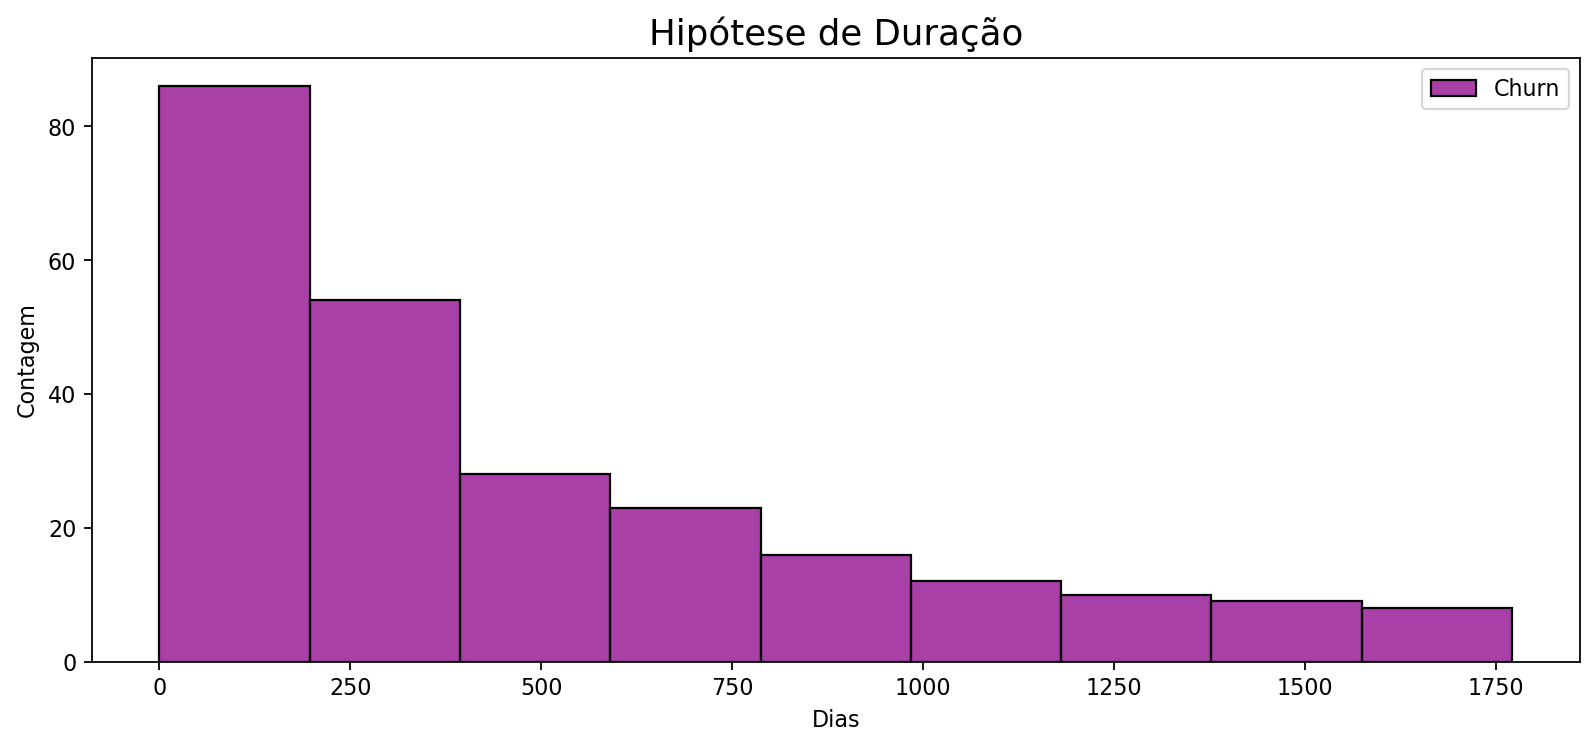

,average_ticket,items_quantity,all_revenue,all_orders,recency,churn,duracao,idade,age_group,mkt_src,simple_version,region
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.0,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,219.038450,8.581301,1062.286107,4.845528,648.048780,1.0,476.886179,53.609756,2.979675,2.853659,3.195122,1.865854
std,20.919187,2.986961,781.139786,3.510992,457.088825,0.0,452.540371,16.568162,1.426997,1.003528,0.768338,0.730035
min,163.952832,1.000000,0.000000,0.000000,2.000000,1.0,0.000000,26.100000,1.000000,2.000000,2.000000,1.000000
25%,205.763152,7.000000,401.483879,2.000000,251.250000,1.0,122.250000,39.150000,2.000000,2.000000,3.000000,1.000000
50%,219.131020,8.000000,979.947429,4.000000,556.500000,1.0,300.000000,54.050000,3.000000,2.500000,3.000000,2.000000
75%,232.813836,10.750000,1768.257123,8.000000,1012.750000,1.0,750.250000,66.175000,4.000000,4.000000,4.000000,2.000000
max,271.830882,18.000000,2873.700656,11.000000,1820.000000,1.0,1771.000000,82.000000,5.000000,5.000000,4.000000,3.000000


In [483]:

alfa  = df.loc[(df['churn'] == 1) & ((df['mkt_src']!= 1)&(df['mkt_src']!= 6) )
& ((df['simple_version'] == 2 ) | (df['simple_version'] == 3 ) | (df['simple_version'] == 4))
& ((df['region'] == 1) | (df['region'] == 2) | (df['region'] == 3))]


print(F'Média de Receita Acumulada: {alfa.all_revenue.mean()}')
print(F'Média de Pedidos: {alfa.all_orders.mean()}')
print(F'Ticket Médio: {alfa.average_ticket.mean()}')
print(F'Duração Média {alfa.duracao.mean()}')

alfa_churn_rate = len(alfa)/505
print(F'Churn Rate para a hipótese {alfa_churn_rate}')


plt.figure(figsize=(12,5), dpi= 160)

sns.histplot(alfa.duracao,  color="darkmagenta", label="Churn", kde =False)


plt.title('Hipótese de Duração', fontsize=16)
plt.xlabel('Dias')
plt.ylabel('Contagem')
plt.legend()
plt.show()

alfa.describe()

A hipótese acima **cumpriu com o esperado, as médias de ticket médio, número de vendas e receita total estão suficientemente próximas das médias que se esperava encontrar**. Entretanto, existe um grande desvio padrão apresentado na receita total, isso pode ser um indicativo do cancelamento precoce ainda nos primeiros meses, esse alto desvio padrão se repete na duração, outro fator somador na hipótese das desistências precoces.  

Como se suspeita que as evasões ocorrem ainda nos primeiros meses vamos observar o intervalo já discutido nas análises anteriores e ver se ele se mostra significativo dentro da hipótese. Esse intervalo vai de 0 a 450 dias.

In [477]:

d0a1 = len(alfa.loc[(alfa['duracao'] <=100)])
d1a2 = len(alfa.loc[(alfa['duracao'] >100)&(alfa['duracao'] <=200)])
d2a3 = len(alfa.loc[(alfa['duracao'] >200)&(alfa['duracao'] <=300)])
d3a4 = len(alfa.loc[(alfa['duracao'] >300)&(alfa['duracao'] <=400)])
d4a5 = len(alfa.loc[(alfa['duracao'] >400)&(alfa['duracao'] <=450)])

print(F'Porcentagem de Cancelamentos até 450 dias dentro da hipótese : {(d0a1 + d1a2 + d2a3 + d3a4 + d4a5)/len(alfa)}')
print(F'Porcentagem de Cancelamentos entre 0 e 100 dias dentro da hipótese : {d0a1/len(alfa)}')
print(F'Porcentagem de Cancelamentos entre 100 e 200 dias dentro da hipótese : {d1a2/len(alfa)}')
print(F'Porcentagem de Cancelamentos entre 200 e 300 dias dentro da hipótese : {d2a3/len(alfa)}')
print(F'Porcentagem de Cancelamentos entre 300 e 400 dias dentro da hipótese : {d3a4/len(alfa)}')
print(F'Porcentagem de Cancelamentos entre 400 e 450 dias dentro da hipótese : {d4a5/len(alfa)}')
print()
print(F'Porcentagem de Cancelamentos até 450 dias no total de cancelamentos : {(d0a1 + d1a2 + d2a3 + d3a4 + d4a5)/505}')
print(F'Porcentagem de Cancelamentos entre 0 e 100 dias no total de cancelamentos : {d0a1/505}')

Porcentagem de Cancelamentos até 450 dias dentro da hipótese : 0.5975609756097561
Porcentagem de Cancelamentos entre 0 e 100 dias dentro da hipótese : 0.22357723577235772
Porcentagem de Cancelamentos entre 100 e 200 dias dentro da hipótese : 0.13821138211382114
Porcentagem de Cancelamentos entre 200 e 300 dias dentro da hipótese : 0.13821138211382114
Porcentagem de Cancelamentos entre 300 e 400 dias dentro da hipótese : 0.06910569105691057
Porcentagem de Cancelamentos entre 400 e 450 dias dentro da hipótese : 0.028455284552845527

Porcentagem de Cancelamentos até 450 dias no total de cancelamentos : 0.29108910891089107
Porcentagem de Cancelamentos entre 0 e 100 dias no total de cancelamentos : 0.10891089108910891


Os resultados acima mostram que a suspeita é verdadeira, **59,7%** dos cancelamentos da hipótese ocorreram  em até 450 dias e **22,3%** ocorreram nos primeiros 3 meses.

Sozinhos essa população que atende a hipótese representa **48,7%** do universo dos cancelamentos. Sendo que destes, **29,1%** cancelam nos primeiros **450 dias** e **10,8%** nos primeiros **3 meses**. 

A hipótese **é satifatória**, pois existe correlação entre multiplas variáveis ao mesmo tempo,cabe agora analisar os dados referentes aos cadastros ativos e pausados para avaliar se uma solução embasada na hipótese surtiria o efeito esperado para o time de assinaturas.

### Aplicando a hipótese as Populações Active e Paused



Existem 4508 clientes em circustancias semelhantes a hipótese
Esses clientes representam 47.47761979989468% do total de clientes que não evadiram

Média de Receita Acumulada: 1177.0157138244892
Média de Pedidos: 5.419254658385094
Ticket Médio: 217.09897584965782
Duração Média:884.1286601597161

Existem 1173 clientes em circustancias extremamente semelhantes a hipótese
Esses clientes representam 12.35387045813586% do total de clientes que não evadiram

Média de Receita Acumulada até 450 dias: 962.8958500330027
Média de Pedidos até 450 dias:: 4.450980392156863
Ticket Médio até 450 dias:: 216.2385240673253
Duração Média até 450 dias: 213.28559249786872



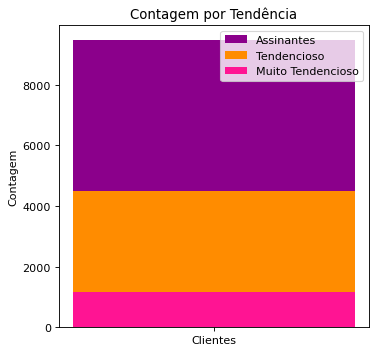

In [484]:
alfa  = df.loc[((df['churn'] == 0)|(df['churn'] == -1)) 
& ((df['mkt_src'] != 1)&(df['mkt_src'] != 6)) 
& ((df['simple_version'] == 2 ) | (df['simple_version'] == 3 ) | (df['simple_version'] == 4))
& ((df['region'] == 1) | (df['region'] == 2) | (df['region'] == 3))]

alfa_v = alfa.loc[alfa['duracao'] <= 450 ]
clientes_not_churn = df.loc[((df['churn'] == 0)|(df['churn'] == -1))]

aux = len(alfa)
aux2 = len(alfa_v)
aux3 = len(clientes_not_churn)


print(F'Existem {aux} clientes em circustancias semelhantes a hipótese')
print(F'Esses clientes representam {(aux/aux3)*100}% do total de clientes que não evadiram')
print()

print(F'Média de Receita Acumulada: {alfa.all_revenue.mean()}')
print(F'Média de Pedidos: {alfa.all_orders.mean()}')
print(F'Ticket Médio: {alfa.average_ticket.mean()}')
print(F'Duração Média:{alfa.duracao.mean()}')
print()

print(F'Existem {aux2} clientes em circustancias extremamente semelhantes a hipótese')
print(F'Esses clientes representam {(aux2/aux3)*100}% do total de clientes que não evadiram')
print()

print(F'Média de Receita Acumulada até 450 dias: {alfa_v.all_revenue.mean()}')
print(F'Média de Pedidos até 450 dias:: {alfa_v.all_orders.mean()}')
print(F'Ticket Médio até 450 dias:: {alfa_v.average_ticket.mean()}')
print(F'Duração Média até 450 dias: {alfa_v.duracao.mean()}')
print()


fig, ax = plt.subplots(figsize=(5,5), dpi= 80)

ax.bar('Clientes', aux3,label='Assinantes', color='darkmagenta')
ax.bar('Clientes', aux, label='Tendencioso',color='darkorange')
ax.bar('Clientes', aux2, label='Muito Tendencioso',color='deeppink')

ax.set_ylabel('Contagem')
ax.set_title('Contagem por Tendência')
ax.legend()

plt.show()

**47,73%** de todos os clientes que não cancelaram se encontram dentro dos parâmetros selecionados, contudo podemos perceber que o período de permanência está fora da hipótese levantada, eles são indicados com o uso de 4 parâmetros simultâneos o que indica uma forte correlação entre eles, **eles precisam receber novas ações do time de assinaturas por meio de ***crm ou Telegram/Whatsapp*** para evitar a sua evasão**.

Contudo Pode-se perceber que existem **12,10%** dos clientes ativos ou pausados que se encontram em parâmetros muito próximos aos apresentados pelas análises, inclusive na janela de tempo que gera a princiapal evasão (**0:442**).Levando em consideração que eles atendem a **5 parâmetros simultâneamente**. **Eles devem ser o foco de novas ações do time de assinaturas por meio de ***crm ou Telegram/Whatsapp*** para evitar a sua evasão**.

## Conclusão: Aprendizado & Próximos Passos 

### Aprendizados

Como apontado pelas várias análises que foram feitas, além de existirem fatores que estão diretamente ligados a decisão pelo cancelamento. Existem ainda correlações entre esses fatores, o que fornece um direcionamento mais claro para uma atuação imediata do time de negócios.

1.  Esses fatores que aparentam estar ligados a taxa de Churn são apresentados a seguir: 

2.  O período com maior incidência ocorre no primeiro Quartil (**0 a 442 dias**) dos valores de *duracao* e corresponde a **57%** dos   Churns.

3.  Gastos Acumulados por clientes antes do cancelamento são de até **R$ 1.060,00** e correspondem a **40%** dos Churns.

4.  Clientes com planos tipo **3.X.X** e **4.X.X** possuem os maiores indices de churn somados aos do tipo **2.X.X** equivalem a    **83%** dos cancelamentos.

5.  Há em média de **4,857** pedidos antes do churn que, estes correspondem a **39,4%** dos casos.

6.  Clientes que vieram a plataforma por ***Tráfego Orgânico*** correspondem sozinhos a **38,8%** dos casos de churn, contudo se somados ao contato por ***direct*** e ***Trafego pago***  equivalem a **70%** dos casos de churn.

7.  Clientes das **regiões norte, nordeste e centro oeste** somam **76,5%** de todo o churn apresentado nos estados.

Ao associar os fatores, **canal de marketing, versão da assinatura e região**. Confirmaram-se valores próximos levantados pela hipótese estes sendo, o **ticket médio de 220 reais**, a **duração média entre 0 e 450 dias** e uma **receita total média próxima a 1100 reais**. O que indica uma forte correlação entre esses fatores. Essa população que atende a hipótese representa **48,7%%** do universo dos cancelamentos, o que é bastante significativo.

### Próximos Passos 

Com os aprendizados da análise, existem dois passos imediatos que podem ser tomados. Ambos serão baseados na mesma estratégia de atuação, contudo terão como foco populações ligeiramente distintas. 

Utilizar o CRM para identificar padrões de consumo e então estimular esse consumo por meio de cupons, créditos e descontos personalizados assim como frete grátis para populações que atendam aos seguintes parâmetros, priorizando os que apresentam mais de um parâmetro ao mesmo tempo:

a.	Possuem uma Assinatura do Tipo 3.X.X, 4.X.X ou 2.X.X.

b.	Estão Localizados em estados da Região, Norte, Nordeste e Centro-Oeste.

c.	Clientes que não foram alvo de estratégias baseadas em CRM e Telegram/Whatsapp

d. Clientes que tenham assinatura de 0 a 450 dias. 

